# DonorsChoose

<p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>

## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_3:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>


In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

#Chunkize warning while installing gensim:  https://stackoverflow.com/questions/41658568/chunkize-warning-while-installing-gensim
import warnings
warnings.filterwarnings(action='ignore', category=UserWarning, module='gensim')

import gensim

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os

from plotly import plotly
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
from collections import Counter

## 1.1 Reading Data

In [2]:
project_data = pd.read_csv('train_data.csv')
resource_data = pd.read_csv('resources.csv')

In [3]:
print("Number of data points in train data", project_data.shape)
print('-'*100)
print("The attributes of data :", project_data.columns.values)

Number of data points in train data (109248, 17)
----------------------------------------------------------------------------------------------------
The attributes of data : ['Unnamed: 0' 'id' 'teacher_id' 'teacher_prefix' 'school_state'
 'project_submitted_datetime' 'project_grade_category'
 'project_subject_categories' 'project_subject_subcategories'
 'project_title' 'project_essay_1' 'project_essay_2' 'project_essay_3'
 'project_essay_4' 'project_resource_summary'
 'teacher_number_of_previously_posted_projects' 'project_is_approved']


In [4]:
# how to replace elements in list python: https://stackoverflow.com/a/2582163/4084039
cols = ['Date' if x=='project_submitted_datetime' else x for x in list(project_data.columns)]


#sort dataframe based on time pandas python: https://stackoverflow.com/a/49702492/4084039
project_data['Date'] = pd.to_datetime(project_data['project_submitted_datetime'])
project_data.drop('project_submitted_datetime', axis=1, inplace=True)
project_data.sort_values(by=['Date'], inplace=True)


# how to reorder columns pandas python: https://stackoverflow.com/a/13148611/4084039
project_data = project_data[cols]


project_data.head(5)

Unnamed: 0       id                        teacher_id teacher_prefix  \
55660        8393  p205479  2bf07ba08945e5d8b2a3f269b2b3cfe5           Mrs.   
76127       37728  p043609  3f60494c61921b3b43ab61bdde2904df            Ms.   
51140       74477  p189804  4a97f3a390bfe21b99cf5e2b81981c73           Mrs.   
473        100660  p234804  cbc0e38f522143b86d372f8b43d4cff3           Mrs.   
41558       33679  p137682  06f6e62e17de34fcf81020c77549e1d5           Mrs.   

      school_state                Date project_grade_category  \
55660           CA 2016-04-27 00:27:36          Grades PreK-2   
76127           UT 2016-04-27 00:31:25             Grades 3-5   
51140           CA 2016-04-27 00:46:53          Grades PreK-2   
473             GA 2016-04-27 00:53:00          Grades PreK-2   
41558           WA 2016-04-27 01:05:25             Grades 3-5   

      project_subject_categories            project_subject_subcategories  \
55660             Math & Science  Applied Sciences, Health & Life Science   
76127              Special Needs                            Special Needs   
51140        Literacy & Language                                 Literacy   
473             Applied Learning                        Early Development   
41558        Literacy & Language                                 Literacy   

                                        project_title  \
55660    Engineering STEAM into the Primary Classroom   
76127                         Sensory Tools for Focus   
51140  Mobile Learning with a Mobile Listening Center   
473            Flexible Seating for Flexible Learning   
41558          Going Deep: The Art of Inner Thinking!   

                                         project_essay_1  \
55660  I have been fortunate enough to use the Fairy ...   
76127  Imagine being 8-9 years old. You're in your th...   
51140  Having a class of 24 students comes with diver...   
473    I recently read an article about giving studen...   
41558  My students crave challenge, they eat obstacle...   

                                         project_essay_2  \
55660  My students come from a variety of backgrounds...   
76127  Most of my students have autism, anxiety, anot...   
51140  I have a class of twenty-four kindergarten stu...   
473    I teach at a low-income (Title 1) school. Ever...   
41558  We are an urban, public k-5 elementary school....   

                                         project_essay_3  \
55660  Each month I try to do several science or STEM...   
76127  It is tough to do more than one thing at a tim...   
51140  By having a mobile listening and storage cente...   
473    We need a classroom rug that we can use as a c...   
41558  With the new common core standards that have b...   

                                         project_essay_4  \
55660  It is challenging to develop high quality scie...   
76127  When my students are able to calm themselves d...   
51140  A mobile listening center will help keep equip...   
473    Benjamin Franklin once said, \"Tell me and I f...   
41558  These remarkable gifts will provide students w...   

                                project_resource_summary  \
55660  My students need STEM kits to learn critical s...   
76127  My students need Boogie Boards for quiet senso...   
51140  My students need a mobile listening center to ...   
473    My students need flexible seating in the class...   
41558  My students need copies of the New York Times ...   

       teacher_number_of_previously_posted_projects  project_is_approved  
55660                                            53                    1  
76127                                             4                    1  
51140                                            10                    1  
473                                               2                    1  
41558                                             2                    1

In [5]:
print("Number of data points in train data", resource_data.shape)
print(resource_data.columns.values)
resource_data.head(5)

Number of data points in train data (1541272, 4)
['id' 'description' 'quantity' 'price']


id                                        description  quantity  \
0  p233245  LC652 - Lakeshore Double-Space Mobile Drying Rack         1   
1  p069063        Bouncy Bands for Desks (Blue support pipes)         3   
2  p069063  Cory Stories: A Kid's Book About Living With Adhd         1   
3  p069063  Dixon Ticonderoga Wood-Cased #2 HB Pencils, Bo...         2   
4  p069063  EDUCATIONAL INSIGHTS FLUORESCENT LIGHT FILTERS...         3   

    price  
0  149.00  
1   14.95  
2    8.45  
3   13.59  
4   24.95

## 1.2 preprocessing of `project_subject_categories`

In [6]:
catogories = list(project_data['project_subject_categories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())
    
project_data['clean_categories'] = cat_list
project_data.drop(['project_subject_categories'], axis=1, inplace=True)

from collections import Counter
my_counter = Counter()
for word in project_data['clean_categories'].values:
    my_counter.update(word.split())

cat_dict = dict(my_counter)
sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))


## 1.3 preprocessing of `project_subject_subcategories`

In [7]:
sub_catogories = list(project_data['project_subject_subcategories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

sub_cat_list = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

project_data['clean_subcategories'] = sub_cat_list
project_data.drop(['project_subject_subcategories'], axis=1, inplace=True)

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter = Counter()
for word in project_data['clean_subcategories'].values:
    my_counter.update(word.split())
    
sub_cat_dict = dict(my_counter)
sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))

## Preprocessing Project Grade Category

In [8]:
#  pre-processing grades for outputs look like "grades_9_12"
project_grade_category = []
for i in range(len(project_data)):
    pgd = project_data["project_grade_category"][i].replace(" ","_")
    pgd = pgd.replace("-","_")
    """pgd = project_data["project_grade_category"][i].replace("Grades","")"""
    project_grade_category.append(pgd)
    
project_data.drop(['project_grade_category'], axis=1, inplace=True)
project_data["project_grade_category"] = project_grade_category

project_data.head(5)

Unnamed: 0       id                        teacher_id teacher_prefix  \
55660        8393  p205479  2bf07ba08945e5d8b2a3f269b2b3cfe5           Mrs.   
76127       37728  p043609  3f60494c61921b3b43ab61bdde2904df            Ms.   
51140       74477  p189804  4a97f3a390bfe21b99cf5e2b81981c73           Mrs.   
473        100660  p234804  cbc0e38f522143b86d372f8b43d4cff3           Mrs.   
41558       33679  p137682  06f6e62e17de34fcf81020c77549e1d5           Mrs.   

      school_state                Date  \
55660           CA 2016-04-27 00:27:36   
76127           UT 2016-04-27 00:31:25   
51140           CA 2016-04-27 00:46:53   
473             GA 2016-04-27 00:53:00   
41558           WA 2016-04-27 01:05:25   

                                        project_title  \
55660    Engineering STEAM into the Primary Classroom   
76127                         Sensory Tools for Focus   
51140  Mobile Learning with a Mobile Listening Center   
473            Flexible Seating for Flexible Learning   
41558          Going Deep: The Art of Inner Thinking!   

                                         project_essay_1  \
55660  I have been fortunate enough to use the Fairy ...   
76127  Imagine being 8-9 years old. You're in your th...   
51140  Having a class of 24 students comes with diver...   
473    I recently read an article about giving studen...   
41558  My students crave challenge, they eat obstacle...   

                                         project_essay_2  \
55660  My students come from a variety of backgrounds...   
76127  Most of my students have autism, anxiety, anot...   
51140  I have a class of twenty-four kindergarten stu...   
473    I teach at a low-income (Title 1) school. Ever...   
41558  We are an urban, public k-5 elementary school....   

                                         project_essay_3  \
55660  Each month I try to do several science or STEM...   
76127  It is tough to do more than one thing at a tim...   
51140  By having a mobile listening and storage cente...   
473    We need a classroom rug that we can use as a c...   
41558  With the new common core standards that have b...   

                                         project_essay_4  \
55660  It is challenging to develop high quality scie...   
76127  When my students are able to calm themselves d...   
51140  A mobile listening center will help keep equip...   
473    Benjamin Franklin once said, \"Tell me and I f...   
41558  These remarkable gifts will provide students w...   

                                project_resource_summary  \
55660  My students need STEM kits to learn critical s...   
76127  My students need Boogie Boards for quiet senso...   
51140  My students need a mobile listening center to ...   
473    My students need flexible seating in the class...   
41558  My students need copies of the New York Times ...   

       teacher_number_of_previously_posted_projects  project_is_approved  \
55660                                            53                    1   
76127                                             4                    1   
51140                                            10                    1   
473                                               2                    1   
41558                                             2                    1   

        clean_categories                 clean_subcategories  \
55660       Math_Science  AppliedSciences Health_LifeScience   
76127       SpecialNeeds                        SpecialNeeds   
51140  Literacy_Language                            Literacy   
473      AppliedLearning                    EarlyDevelopment   
41558  Literacy_Language                            Literacy   

      project_grade_category  
55660          Grades_PreK_2  
76127             Grades_6_8  
51140             Grades_6_8  
473            Grades_PreK_2  
41558          Grades_PreK_2

## 1.3 Text preprocessing

In [9]:
# merge two column text dataframe: 
project_data["essay"] = project_data["project_essay_1"].map(str) +\
                        project_data["project_essay_2"].map(str) + \
                        project_data["project_essay_3"].map(str) + \
                        project_data["project_essay_4"].map(str)

In [10]:
# Data Frame tolower -> https://stackoverflow.com/questions/39512002/convert-whole-dataframe-from-lower-case-to-upper-case-with-pandas
# Data Frame tolower -> https://www.geeksforgeeks.org/apply-uppercase-to-a-column-in-pandas-dataframe/
project_data['essay']= project_data['essay'].str.lower()
project_data['project_title']=project_data['project_title'].str.lower()

project_data['teacher_prefix']=project_data['teacher_prefix'].str.lower()
project_data['school_state']=project_data['school_state'].str.lower()
project_data['project_resource_summary']=project_data['project_resource_summary'].str.lower()
project_data['clean_subcategories']=project_data['clean_subcategories'].str.lower()
project_data['clean_categories']=project_data['clean_categories'].str.lower()

In [11]:
project_data.head(5)

Unnamed: 0       id                        teacher_id teacher_prefix  \
55660        8393  p205479  2bf07ba08945e5d8b2a3f269b2b3cfe5           mrs.   
76127       37728  p043609  3f60494c61921b3b43ab61bdde2904df            ms.   
51140       74477  p189804  4a97f3a390bfe21b99cf5e2b81981c73           mrs.   
473        100660  p234804  cbc0e38f522143b86d372f8b43d4cff3           mrs.   
41558       33679  p137682  06f6e62e17de34fcf81020c77549e1d5           mrs.   

      school_state                Date  \
55660           ca 2016-04-27 00:27:36   
76127           ut 2016-04-27 00:31:25   
51140           ca 2016-04-27 00:46:53   
473             ga 2016-04-27 00:53:00   
41558           wa 2016-04-27 01:05:25   

                                        project_title  \
55660    engineering steam into the primary classroom   
76127                         sensory tools for focus   
51140  mobile learning with a mobile listening center   
473            flexible seating for flexible learning   
41558          going deep: the art of inner thinking!   

                                         project_essay_1  \
55660  I have been fortunate enough to use the Fairy ...   
76127  Imagine being 8-9 years old. You're in your th...   
51140  Having a class of 24 students comes with diver...   
473    I recently read an article about giving studen...   
41558  My students crave challenge, they eat obstacle...   

                                         project_essay_2  \
55660  My students come from a variety of backgrounds...   
76127  Most of my students have autism, anxiety, anot...   
51140  I have a class of twenty-four kindergarten stu...   
473    I teach at a low-income (Title 1) school. Ever...   
41558  We are an urban, public k-5 elementary school....   

                                         project_essay_3  \
55660  Each month I try to do several science or STEM...   
76127  It is tough to do more than one thing at a tim...   
51140  By having a mobile listening and storage cente...   
473    We need a classroom rug that we can use as a c...   
41558  With the new common core standards that have b...   

                                         project_essay_4  \
55660  It is challenging to develop high quality scie...   
76127  When my students are able to calm themselves d...   
51140  A mobile listening center will help keep equip...   
473    Benjamin Franklin once said, \"Tell me and I f...   
41558  These remarkable gifts will provide students w...   

                                project_resource_summary  \
55660  my students need stem kits to learn critical s...   
76127  my students need boogie boards for quiet senso...   
51140  my students need a mobile listening center to ...   
473    my students need flexible seating in the class...   
41558  my students need copies of the new york times ...   

       teacher_number_of_previously_posted_projects  project_is_approved  \
55660                                            53                    1   
76127                                             4                    1   
51140                                            10                    1   
473                                               2                    1   
41558                                             2                    1   

        clean_categories                 clean_subcategories  \
55660       math_science  appliedsciences health_lifescience   
76127       specialneeds                        specialneeds   
51140  literacy_language                            literacy   
473      appliedlearning                    earlydevelopment   
41558  literacy_language                            literacy   

      project_grade_category  \
55660          Grades_PreK_2   
76127             Grades_6_8   
51140             Grades_6_8   
473            Grades_PreK_2   
41558          Grades_PreK_2   

                                                   essay  
55660  i have been fortunate enough t

In [12]:
#### 1.4.2.3 Using Pretrained Models: TFIDF weighted W2V

In [13]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [14]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [15]:
# Combining all the above stundents 
from tqdm import tqdm
preprocessed_essays = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
    preprocessed_essays.append(sent.lower().strip())

100%|████████████████████████████████████████████████████████████████████████| 109248/109248 [01:31<00:00, 1188.12it/s]


In [16]:
# after preprocesing
preprocessed_essays[20000]

'person person no matter small dr seuss teach smallest students biggest enthusiasm learning students learn many different ways using senses multiple intelligences use wide range techniques help students succeed students class come variety different backgrounds makes wonderful sharing experiences cultures including native americans school caring community successful learners seen collaborative student project based learning classroom kindergarteners class love work hands materials many different opportunities practice skill mastered social skills work cooperatively friends crucial aspect kindergarten curriculum montana perfect place learn agriculture nutrition students love role play pretend kitchen early childhood classroom several kids ask try cooking real food take idea create common core cooking lessons learn important math writing concepts cooking delicious healthy food snack time students grounded appreciation work went making food knowledge ingredients came well healthy bodies pr

In [17]:
project_data['preprocessed_essays'] = preprocessed_essays
project_data.drop(['essay'], axis=1, inplace=True)
project_data.head(5)

Unnamed: 0       id                        teacher_id teacher_prefix  \
55660        8393  p205479  2bf07ba08945e5d8b2a3f269b2b3cfe5           mrs.   
76127       37728  p043609  3f60494c61921b3b43ab61bdde2904df            ms.   
51140       74477  p189804  4a97f3a390bfe21b99cf5e2b81981c73           mrs.   
473        100660  p234804  cbc0e38f522143b86d372f8b43d4cff3           mrs.   
41558       33679  p137682  06f6e62e17de34fcf81020c77549e1d5           mrs.   

      school_state                Date  \
55660           ca 2016-04-27 00:27:36   
76127           ut 2016-04-27 00:31:25   
51140           ca 2016-04-27 00:46:53   
473             ga 2016-04-27 00:53:00   
41558           wa 2016-04-27 01:05:25   

                                        project_title  \
55660    engineering steam into the primary classroom   
76127                         sensory tools for focus   
51140  mobile learning with a mobile listening center   
473            flexible seating for flexible learning   
41558          going deep: the art of inner thinking!   

                                         project_essay_1  \
55660  I have been fortunate enough to use the Fairy ...   
76127  Imagine being 8-9 years old. You're in your th...   
51140  Having a class of 24 students comes with diver...   
473    I recently read an article about giving studen...   
41558  My students crave challenge, they eat obstacle...   

                                         project_essay_2  \
55660  My students come from a variety of backgrounds...   
76127  Most of my students have autism, anxiety, anot...   
51140  I have a class of twenty-four kindergarten stu...   
473    I teach at a low-income (Title 1) school. Ever...   
41558  We are an urban, public k-5 elementary school....   

                                         project_essay_3  \
55660  Each month I try to do several science or STEM...   
76127  It is tough to do more than one thing at a tim...   
51140  By having a mobile listening and storage cente...   
473    We need a classroom rug that we can use as a c...   
41558  With the new common core standards that have b...   

                                         project_essay_4  \
55660  It is challenging to develop high quality scie...   
76127  When my students are able to calm themselves d...   
51140  A mobile listening center will help keep equip...   
473    Benjamin Franklin once said, \"Tell me and I f...   
41558  These remarkable gifts will provide students w...   

                                project_resource_summary  \
55660  my students need stem kits to learn critical s...   
76127  my students need boogie boards for quiet senso...   
51140  my students need a mobile listening center to ...   
473    my students need flexible seating in the class...   
41558  my students need copies of the new york times ...   

       teacher_number_of_previously_posted_projects  project_is_approved  \
55660                                            53                    1   
76127                                             4                    1   
51140                                            10                    1   
473                                               2                    1   
41558                                             2                    1   

        clean_categories                 clean_subcategories  \
55660       math_science  appliedsciences health_lifescience   
76127       specialneeds                        specialneeds   
51140  literacy_language                            literacy   
473      appliedlearning                    earlydevelopment   
41558  literacy_language                            literacy   

      project_grade_category  \
55660          Grades_PreK_2   
76127             Grades_6_8   
51140             Grades_6_8   
473            Grades_PreK_2   
41558          Grades_PreK_2   

                                     preprocessed_essays  
55660  fortunate enough use fairy tal

<h2><font color='green'> 1.4 Preprocessing of `project_title`</font></h2>

In [18]:
# similarly you can preprocess the titles also
# code is copy from my 2nd Assignment 
from tqdm import tqdm
preprocessed_project_title = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['project_title'].values):
    PT = decontracted(sentance)
    PT = PT.replace('\\r', ' ')
    PT = PT.replace('\\"', ' ')
    PT = PT.replace('\\n', ' ')
    PT = re.sub('[^A-Za-z0-9]+', ' ', PT)
    # https://gist.github.com/sebleier/554280
    PT = ' '.join( e for e in PT.split() if e.lower not in stopwords)
    preprocessed_project_title.append(PT.lower().strip())
    


100%|███████████████████████████████████████████████████████████████████████| 109248/109248 [00:05<00:00, 21064.46it/s]


In [19]:
# after preprocesing
preprocessed_project_title[2000]

'empowering students through art in the makerspace'

In [20]:
project_data['preprocessed_project_title'] = preprocessed_project_title
project_data.drop(['project_title'], axis=1, inplace=True)
project_data.head(5)

Unnamed: 0       id                        teacher_id teacher_prefix  \
55660        8393  p205479  2bf07ba08945e5d8b2a3f269b2b3cfe5           mrs.   
76127       37728  p043609  3f60494c61921b3b43ab61bdde2904df            ms.   
51140       74477  p189804  4a97f3a390bfe21b99cf5e2b81981c73           mrs.   
473        100660  p234804  cbc0e38f522143b86d372f8b43d4cff3           mrs.   
41558       33679  p137682  06f6e62e17de34fcf81020c77549e1d5           mrs.   

      school_state                Date  \
55660           ca 2016-04-27 00:27:36   
76127           ut 2016-04-27 00:31:25   
51140           ca 2016-04-27 00:46:53   
473             ga 2016-04-27 00:53:00   
41558           wa 2016-04-27 01:05:25   

                                         project_essay_1  \
55660  I have been fortunate enough to use the Fairy ...   
76127  Imagine being 8-9 years old. You're in your th...   
51140  Having a class of 24 students comes with diver...   
473    I recently read an article about giving studen...   
41558  My students crave challenge, they eat obstacle...   

                                         project_essay_2  \
55660  My students come from a variety of backgrounds...   
76127  Most of my students have autism, anxiety, anot...   
51140  I have a class of twenty-four kindergarten stu...   
473    I teach at a low-income (Title 1) school. Ever...   
41558  We are an urban, public k-5 elementary school....   

                                         project_essay_3  \
55660  Each month I try to do several science or STEM...   
76127  It is tough to do more than one thing at a tim...   
51140  By having a mobile listening and storage cente...   
473    We need a classroom rug that we can use as a c...   
41558  With the new common core standards that have b...   

                                         project_essay_4  \
55660  It is challenging to develop high quality scie...   
76127  When my students are able to calm themselves d...   
51140  A mobile listening center will help keep equip...   
473    Benjamin Franklin once said, \"Tell me and I f...   
41558  These remarkable gifts will provide students w...   

                                project_resource_summary  \
55660  my students need stem kits to learn critical s...   
76127  my students need boogie boards for quiet senso...   
51140  my students need a mobile listening center to ...   
473    my students need flexible seating in the class...   
41558  my students need copies of the new york times ...   

       teacher_number_of_previously_posted_projects  project_is_approved  \
55660                                            53                    1   
76127                                             4                    1   
51140                                            10                    1   
473                                               2                    1   
41558                                             2                    1   

        clean_categories                 clean_subcategories  \
55660       math_science  appliedsciences health_lifescience   
76127       specialneeds                        specialneeds   
51140  literacy_language                            literacy   
473      appliedlearning                    earlydevelopment   
41558  literacy_language                            literacy   

      project_grade_category  \
55660          Grades_PreK_2   
76127             Grades_6_8   
51140             Grades_6_8   
473            Grades_PreK_2   
41558          Grades_PreK_2   

                                     preprocessed_essays  \
55660  fortunate enough use fairy tale stem kits clas...   
76127  imagine 8 9 years old third grade classroom se...   
51140  class 24 students comes diverse learners stude...   
473    recently read article giving students choice l...   
41558  students crave challenge eat obstacles breakfa...   

                           preprocessed_project_title  
55660    engineering s

## Remove nan from teacher_prefix

In [21]:
project_data['teacher_prefix'] = project_data['teacher_prefix'].fillna(' ')


## finding numer of Word count Title and Essay

In [22]:
word_count_title = []
for a in project_data["preprocessed_project_title"]:
    wct = len(a.split())
    word_count_title.append(wct)
    
project_data["word_count_title"] = word_count_title
word_count_essay = []
for a in project_data["preprocessed_essays"]:
    wce = len(a.split())
    word_count_essay.append(wce)
    
project_data["word_count_essay"] = word_count_essay
project_data.head(5)

Unnamed: 0       id                        teacher_id teacher_prefix  \
55660        8393  p205479  2bf07ba08945e5d8b2a3f269b2b3cfe5           mrs.   
76127       37728  p043609  3f60494c61921b3b43ab61bdde2904df            ms.   
51140       74477  p189804  4a97f3a390bfe21b99cf5e2b81981c73           mrs.   
473        100660  p234804  cbc0e38f522143b86d372f8b43d4cff3           mrs.   
41558       33679  p137682  06f6e62e17de34fcf81020c77549e1d5           mrs.   

      school_state                Date  \
55660           ca 2016-04-27 00:27:36   
76127           ut 2016-04-27 00:31:25   
51140           ca 2016-04-27 00:46:53   
473             ga 2016-04-27 00:53:00   
41558           wa 2016-04-27 01:05:25   

                                         project_essay_1  \
55660  I have been fortunate enough to use the Fairy ...   
76127  Imagine being 8-9 years old. You're in your th...   
51140  Having a class of 24 students comes with diver...   
473    I recently read an article about giving studen...   
41558  My students crave challenge, they eat obstacle...   

                                         project_essay_2  \
55660  My students come from a variety of backgrounds...   
76127  Most of my students have autism, anxiety, anot...   
51140  I have a class of twenty-four kindergarten stu...   
473    I teach at a low-income (Title 1) school. Ever...   
41558  We are an urban, public k-5 elementary school....   

                                         project_essay_3  \
55660  Each month I try to do several science or STEM...   
76127  It is tough to do more than one thing at a tim...   
51140  By having a mobile listening and storage cente...   
473    We need a classroom rug that we can use as a c...   
41558  With the new common core standards that have b...   

                                         project_essay_4  \
55660  It is challenging to develop high quality scie...   
76127  When my students are able to calm themselves d...   
51140  A mobile listening center will help keep equip...   
473    Benjamin Franklin once said, \"Tell me and I f...   
41558  These remarkable gifts will provide students w...   

                                project_resource_summary  \
55660  my students need stem kits to learn critical s...   
76127  my students need boogie boards for quiet senso...   
51140  my students need a mobile listening center to ...   
473    my students need flexible seating in the class...   
41558  my students need copies of the new york times ...   

       teacher_number_of_previously_posted_projects  project_is_approved  \
55660                                            53                    1   
76127                                             4                    1   
51140                                            10                    1   
473                                               2                    1   
41558                                             2                    1   

        clean_categories                 clean_subcategories  \
55660       math_science  appliedsciences health_lifescience   
76127       specialneeds                        specialneeds   
51140  literacy_language                            literacy   
473      appliedlearning                    earlydevelopment   
41558  literacy_language                            literacy   

      project_grade_category  \
55660          Grades_PreK_2   
76127             Grades_6_8   
51140             Grades_6_8   
473            Grades_PreK_2   
41558          Grades_PreK_2   

                                     preprocessed_essays  \
55660  fortunate enough use fairy tale stem kits clas...   
76127  imagine 8 9 years old third grade classroom se...   
51140  class 24 students comes diverse learners stude...   
473    recently read article giving students choice l...   
41558  students crave challenge eat obstacles breakfa...   

                           preprocessed_project_title  word_count_title  \
556

## Calculating Sentiment Score for Essay

In [23]:
# SentimentIntensityAnalyzer -> https://www.nltk.org/api/nltk.sentiment.html
# SentimentIntensityAnalyzer -> https://www.programcreek.com/python/example/100005/nltk.sentiment.vader.SentimentIntensityAnalyzer
# sentimental analysis -> https://github.com/Kunal-Varma/Sentiment_Analysis/blob/master/Sentiment_Analysis.ipynb
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')

model_aalyser = SentimentIntensityAnalyzer()

negetive = []
positive = []
neutral = []
compound = []

for x in tqdm(project_data["preprocessed_essays"]):
    s_neg = model_aalyser.polarity_scores(x)['neg']
    s_pos = model_aalyser.polarity_scores(x)['pos']
    e_neu = model_aalyser.polarity_scores(x)['neu']
    s_com = model_aalyser.polarity_scores(x)['compound']
    negetive.append(s_neg)
    positive.append(s_pos)
    neutral.append(e_neu)
    compound.append(s_com)
    
project_data["negetive"] = negetive
project_data["positive"] = positive
project_data["neutral"] = neutral
project_data["compound"] = compound


project_data.head(5)    

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\prasa\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
100%|██████████████████████████████████████████████████████████████████████████| 109248/109248 [18:43<00:00, 97.23it/s]


Unnamed: 0       id                        teacher_id teacher_prefix  \
55660        8393  p205479  2bf07ba08945e5d8b2a3f269b2b3cfe5           mrs.   
76127       37728  p043609  3f60494c61921b3b43ab61bdde2904df            ms.   
51140       74477  p189804  4a97f3a390bfe21b99cf5e2b81981c73           mrs.   
473        100660  p234804  cbc0e38f522143b86d372f8b43d4cff3           mrs.   
41558       33679  p137682  06f6e62e17de34fcf81020c77549e1d5           mrs.   

      school_state                Date  \
55660           ca 2016-04-27 00:27:36   
76127           ut 2016-04-27 00:31:25   
51140           ca 2016-04-27 00:46:53   
473             ga 2016-04-27 00:53:00   
41558           wa 2016-04-27 01:05:25   

                                         project_essay_1  \
55660  I have been fortunate enough to use the Fairy ...   
76127  Imagine being 8-9 years old. You're in your th...   
51140  Having a class of 24 students comes with diver...   
473    I recently read an article about giving studen...   
41558  My students crave challenge, they eat obstacle...   

                                         project_essay_2  \
55660  My students come from a variety of backgrounds...   
76127  Most of my students have autism, anxiety, anot...   
51140  I have a class of twenty-four kindergarten stu...   
473    I teach at a low-income (Title 1) school. Ever...   
41558  We are an urban, public k-5 elementary school....   

                                         project_essay_3  \
55660  Each month I try to do several science or STEM...   
76127  It is tough to do more than one thing at a tim...   
51140  By having a mobile listening and storage cente...   
473    We need a classroom rug that we can use as a c...   
41558  With the new common core standards that have b...   

                                         project_essay_4    ...     \
55660  It is challenging to develop high quality scie...    ...      
76127  When my students are able to calm themselves d...    ...      
51140  A mobile listening center will help keep equip...    ...      
473    Benjamin Franklin once said, \"Tell me and I f...    ...      
41558  These remarkable gifts will provide students w...    ...      

                      clean_subcategories  project_grade_category  \
55660  appliedsciences health_lifescience           Grades_PreK_2   
76127                        specialneeds              Grades_6_8   
51140                            literacy              Grades_6_8   
473                      earlydevelopment           Grades_PreK_2   
41558                            literacy           Grades_PreK_2   

                                     preprocessed_essays  \
55660  fortunate enough use fairy tale stem kits clas...   
76127  imagine 8 9 years old third grade classroom se...   
51140  class 24 students comes diverse learners stude...   
473    recently read article giving students choice l...   
41558  students crave challenge eat obstacles breakfa...   

                           preprocessed_project_title word_count_title  \
55660    engineering steam into the primary classroom                6   
76127                         sensory tools for focus                4   
51140  mobile learning with a mobile listening center                7   
473            flexible seating for flexible learning                5   
41558            going deep the art of inner thinking                7   

      word_count_essay negetive positive  neutral  compound  
55660              156    0.013    0.214    0.773    0.9867  
76127              159    0.078    0.272    0.650    0.9899  
51140              106    0.016    0.278    0.706    0.9864  
473                114    0.031    0.194    0.775    0.9524  
41558              101    0.031    0.315    0.653    0.9873  

[5 rows x 24 columns]

## Splitting Data into train, texst & crossvalidation

In [24]:
# split data train text in python
# https://stackoverflow.com/questions/24147278/how-do-i-create-test-and-train-samples-from-one-dataframe-with-pandas
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
# https://scikit-learn.org/0.16/modules/generated/sklearn.cross_validation.train_test_split.html
y = project_data['project_is_approved']
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(project_data, y, test_size=0.30, random_state=0)
"""x_train, x_cv, y_train, y_cv = train_test_split(x_train, y_train, test_size=0.20, random_state=0)"""
print( x_train.shape )
print(x_test.shape)
"""print(x_cv.shape)"""

(76473, 24)
(32775, 24)


'print(x_cv.shape)'

## 1.5 Preparing data for models

In [25]:
project_data.columns
x_train.columns
x_train.head(5)

Unnamed: 0       id                        teacher_id teacher_prefix  \
83559      114444  p155197  72aca64240ff04da1395fb68ed8dd789           mrs.   
26626       89212  p202747  f09b36021ccef9bbb32ffde05d9ae73a           mrs.   
86536       98002  p243052  d45a50eddf7c6c40534607d743d2484f            ms.   
53208      114245  p172679  c43d31b9cbfb573b48b87f202127622a           mrs.   
54734       78749  p052615  7d99840f0b143f0133e9fa22dbeec20e            ms.   

      school_state                Date  \
83559           wa 2016-08-23 19:09:26   
26626           tx 2017-03-28 09:08:04   
86536           fl 2016-08-02 21:20:31   
53208           ca 2016-09-11 00:55:06   
54734           ca 2016-09-05 01:11:36   

                                         project_essay_1  \
83559  My third graders are excited to start this sch...   
26626  Our students would love the opportunity to use...   
86536  My students are mostly struggling level math l...   
53208  My fourth grade students are amazing. My schoo...   
54734  The students in my classroom come from greatly...   

                                         project_essay_2 project_essay_3  \
83559  Reading aloud is one of our class's favorite a...             NaN   
26626  We would use the charging station to charge ou...             NaN   
86536  I teach the lowest 7th grade math classes and ...             NaN   
53208  Fourth grade science is so much fun! We study ...             NaN   
54734  My students sit through long 80 minute block p...             NaN   

      project_essay_4    ...                 clean_subcategories  \
83559             NaN    ...         literacy literature_writing   
26626             NaN    ...                literacy mathematics   
86536             NaN    ...                         mathematics   
53208             NaN    ...                  health_lifescience   
54734             NaN    ...     health_lifescience specialneeds   

       project_grade_category  \
83559           Grades_PreK_2   
26626              Grades_6_8   
86536           Grades_PreK_2   
53208              Grades_6_8   
54734           Grades_PreK_2   

                                     preprocessed_essays  \
83559  third graders excited start school year come d...   
26626  students would love opportunity use technology...   
86536  students mostly struggling level math learners...   
53208  fourth grade students amazing school title lim...   
54734  students classroom come greatly varying socio ...   

                    preprocessed_project_title word_count_title  \
83559        a book for each student to access                7   
26626            charge it up charging station                5   
86536  learning stations in middle school math                6   
53208             fourth grade life scientists                4   
54734        active chairs for active learning                5   

      word_count_essay negetive positive  neutral  compound  
83559              187    0.014    0.347    0.639    0.9973  
26626              116    0.013    0.291    0.697    0.9890  
86536              113    0.146    0.198    0.656    0.8550  
53208              133    0.039    0.303    0.658    0.9925  
54734              116    0.054    0.173    0.773    0.9442  

[5 rows x 24 columns]

we are going to consider

       - school_state : categorical data
       - clean_categories : categorical data
       - clean_subcategories : categorical data
       - project_grade_category : categorical data
       - teacher_prefix : categorical data
       
       - project_title : text data
       - text : text data
       - project_resource_summary: text data (optinal)
       
       - quantity : numerical (optinal)
       - teacher_number_of_previously_posted_projects : numerical
       - price : numerical

### 1.5.1 Vectorizing Categorical data

- https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/

In [26]:

# we use count vectorizer to convert the values into one 
from sklearn.feature_extraction.text import CountVectorizer

vectorizer_cat = CountVectorizer()
vectorizer_cat.fit(x_train['clean_categories'].values)
print(vectorizer_cat.get_feature_names())
# x_train                                 
categories_x_train_one_hot = vectorizer_cat.transform(x_train['clean_categories'].values)
print("Shape of matrix after one hot encodig ",categories_x_train_one_hot.shape)

# x_test
categories_x_test_one_hot = vectorizer_cat.transform(x_test['clean_categories'].values)
print("Shape of matrix after one hot encodig ",categories_x_test_one_hot.shape)

"""# x_cv
categories_x_cv_one_hot = vectorizer_cat.transform(x_cv['clean_categories'].values)

print("Shape of matrix after one hot encodig ",categories_x_cv_one_hot.shape)"""

['appliedlearning', 'care_hunger', 'health_sports', 'history_civics', 'literacy_language', 'math_science', 'music_arts', 'specialneeds', 'warmth']
Shape of matrix after one hot encodig  (76473, 9)
Shape of matrix after one hot encodig  (32775, 9)


'# x_cv\ncategories_x_cv_one_hot = vectorizer_cat.transform(x_cv[\'clean_categories\'].values)\n\nprint("Shape of matrix after one hot encodig ",categories_x_cv_one_hot.shape)'

In [27]:
# we use count vectorizer to convert the values into one 
vectorizer_sub_cat = CountVectorizer()
vectorizer_sub_cat.fit(x_train['clean_subcategories'].values)
print(vectorizer_sub_cat.get_feature_names())
# x_train
sub_categories_x_train_one_hot = vectorizer_sub_cat.transform(x_train['clean_subcategories'].values)

print("Shape of matrix after one hot encodig ",sub_categories_x_train_one_hot.shape)

# x_test
# we use count vectorizer to convert the values into one 
sub_categories_x_test_one_hot = vectorizer_sub_cat.transform(x_test['clean_subcategories'].values)
print("Shape of matrix after one hot encodig ",sub_categories_x_test_one_hot.shape)

"""# x_cv
# we use count vectorizer to convert the values into one 
sub_categories_x_cv_one_hot = vectorizer_sub_cat.transform(x_cv['clean_subcategories'].values)
print("Shape of matrix after one hot encodig ",sub_categories_x_cv_one_hot.shape)"""

['appliedsciences', 'care_hunger', 'charactereducation', 'civics_government', 'college_careerprep', 'communityservice', 'earlydevelopment', 'economics', 'environmentalscience', 'esl', 'extracurricular', 'financialliteracy', 'foreignlanguages', 'gym_fitness', 'health_lifescience', 'health_wellness', 'history_geography', 'literacy', 'literature_writing', 'mathematics', 'music', 'nutritioneducation', 'other', 'parentinvolvement', 'performingarts', 'socialsciences', 'specialneeds', 'teamsports', 'visualarts', 'warmth']
Shape of matrix after one hot encodig  (76473, 30)
Shape of matrix after one hot encodig  (32775, 30)


'# x_cv\n# we use count vectorizer to convert the values into one \nsub_categories_x_cv_one_hot = vectorizer_sub_cat.transform(x_cv[\'clean_subcategories\'].values)\nprint("Shape of matrix after one hot encodig ",sub_categories_x_cv_one_hot.shape)'

In [28]:
# you can do the similar thing with state, teacher_prefix and project_grade_category also

In [29]:
# code is copy from my sample Assignment 
# for states
my_counter = Counter()
for word in project_data['school_state'].values:
    my_counter.update(word.split())

# dict sort by value python: https://stackoverflow.com/a/613218/4084039
state_dict = dict(my_counter)
sorted_state_dict = dict(sorted(state_dict.items(), key=lambda kv: kv[1]))

"""--------------------------------------------------------------"""
vectorizer_school_state = CountVectorizer()
vectorizer_school_state.fit(x_train['school_state'].values)
print(vectorizer_school_state.get_feature_names())
#x_train
school_state_x_train_one_hot = vectorizer_school_state.transform(x_train['school_state'].values)
print("Shape of matrix after one hot encodig ",school_state_x_train_one_hot.shape)

# x_test
school_state_x_test_one_hot = vectorizer_school_state.transform(x_test['school_state'].values)
print("Shape of matrix after one hot encodig ",school_state_x_test_one_hot.shape)

"""# x_cv
# code is copy from my 2nd Assignment 
# for state
school_state_x_cv_one_hot = vectorizer_school_state.transform(x_cv['school_state'].values)
print("Shape of matrix after one hot encodig ",school_state_x_cv_one_hot.shape)"""


['ak', 'al', 'ar', 'az', 'ca', 'co', 'ct', 'dc', 'de', 'fl', 'ga', 'hi', 'ia', 'id', 'il', 'in', 'ks', 'ky', 'la', 'ma', 'md', 'me', 'mi', 'mn', 'mo', 'ms', 'mt', 'nc', 'nd', 'ne', 'nh', 'nj', 'nm', 'nv', 'ny', 'oh', 'ok', 'or', 'pa', 'ri', 'sc', 'sd', 'tn', 'tx', 'ut', 'va', 'vt', 'wa', 'wi', 'wv', 'wy']
Shape of matrix after one hot encodig  (76473, 51)
Shape of matrix after one hot encodig  (32775, 51)


'# x_cv\n# code is copy from my 2nd Assignment \n# for state\nschool_state_x_cv_one_hot = vectorizer_school_state.transform(x_cv[\'school_state\'].values)\nprint("Shape of matrix after one hot encodig ",school_state_x_cv_one_hot.shape)'

In [30]:
# for teacher_prefix 
# code is copy from my 2nd Assignment 
"""project_data['teacher_prefix'] = project_data['teacher_prefix'].fillna(' ')"""
my_counter = Counter()
for t_pre in project_data['teacher_prefix'].values:
    t_pre = str(t_pre)
    my_counter.update(t_pre.split())
t_pre_dict = dict(my_counter)
sorted_t_pre_dict = dict(sorted(t_pre_dict.items(), key=lambda kv: kv[1]))
"""--------------------------------------------------------------"""
vectorizer_teacher_pre = CountVectorizer()
vectorizer_teacher_pre.fit(x_train['teacher_prefix'].values.astype('U'))
print(vectorizer_teacher_pre.get_feature_names())
# x_train
teacher_prefix_x_train_one_hot = vectorizer_teacher_pre.transform(x_train['teacher_prefix'].values.astype('U'))
print("Shape of matrix after one hot encodig ",teacher_prefix_x_train_one_hot.shape)

# x_test
# for teacher_prefix 
# code is copy from my 2nd Assignment 

teacher_prefix_x_test_one_hot = vectorizer_teacher_pre.transform(x_test['teacher_prefix'].values.astype('U'))
print("Shape of matrix after one hot encodig ",teacher_prefix_x_test_one_hot.shape)

"""# x_cv
# for teacher_prefix 
# code is copy from my 2nd Assignment 

teacher_prefix_x_cv_one_hot = vectorizer_teacher_pre.transform(x_cv['teacher_prefix'].values.astype('U'))
print("Shape of matrix after one hot encodig ",teacher_prefix_x_cv_one_hot.shape)"""


['dr', 'mr', 'mrs', 'ms', 'teacher']
Shape of matrix after one hot encodig  (76473, 5)
Shape of matrix after one hot encodig  (32775, 5)


'# x_cv\n# for teacher_prefix \n# code is copy from my 2nd Assignment \n\nteacher_prefix_x_cv_one_hot = vectorizer_teacher_pre.transform(x_cv[\'teacher_prefix\'].values.astype(\'U\'))\nprint("Shape of matrix after one hot encodig ",teacher_prefix_x_cv_one_hot.shape)'

In [31]:

my_counter = Counter()
for project_grade in project_data['project_grade_category'].values:
    my_counter.update(project_grade.split())
    
    
project_grade_cat_dict = dict(my_counter)
sorted_project_grade_cat_dict = dict(sorted(project_grade_cat_dict.items(), key=lambda kv: kv[1]))
 
from sklearn.feature_extraction.text import CountVectorizer
vectorizer_grade = CountVectorizer(vocabulary=list(sorted_project_grade_cat_dict.keys()), lowercase=False, binary=True)
vectorizer_grade.fit(x_train['project_grade_category'].values)
# x_train
# for project_grade_category 
# code is copy from my 2nd Assignment
project_grade_category_x_train_one_hot = vectorizer_grade.transform(x_train['project_grade_category'].values)
"""# x_cv
# for project_grade_category 
# code is copy from my 2nd Assignment
project_grade_category_x_cv_one_hot = vectorizer_grade.transform(x_cv['project_grade_category'].values)"""
# x_test
# for project_grade_category 
# code is copy from my 2nd Assignment
project_grade_category_x_test_one_hot = vectorizer_grade.transform(x_test['project_grade_category'].values)
print(vectorizer_grade.get_feature_names())
print("Shape of matrix after one hot encodig ",project_grade_category_x_train_one_hot.shape)
"""print("Shape of matrix after one hot encodig ",project_grade_category_x_cv_one_hot.shape)"""
print("Shape of matrix after one hot encodig ",project_grade_category_x_test_one_hot.shape)


['Grades_9_12', 'Grades_6_8', 'Grades_3_5', 'Grades_PreK_2']
Shape of matrix after one hot encodig  (76473, 4)
Shape of matrix after one hot encodig  (32775, 4)


### 1.5.2 Vectorizing Text data

#### 1.5.2.1 Bag of words with min_df=10

In [32]:
"""# We are considering only the words which appeared in at least 10 documents(rows or projects).
vectorizer = CountVectorizer(min_df=10)
text_bow = vectorizer.fit_transform(preprocessed_essays)
print("Shape of matrix after one hot encodig ",text_bow.shape)"""
# code copy form sample solution 
from sklearn.feature_extraction.text import CountVectorizer
vectorizer_bow_essays = CountVectorizer(min_df=10)
vectorizer_bow_essays.fit(x_train['preprocessed_essays'].values) # fit has to happen only on train data
# we use the fitted CountVectorizer to convert the text to vector

x_train_essay_bow = vectorizer_bow_essays.transform(x_train["preprocessed_essays"].values)

"""x_cv_essay_bow = vectorizer_bow_essays.transform(x_cv["preprocessed_essays"].values)"""

x_test_essay_bow = vectorizer_bow_essays.transform(x_test["preprocessed_essays"].values)
print("After vectorizations")
print(x_train_essay_bow.shape, y_train.shape)
"""print(x_cv_essay_bow.shape, y_cv.shape)"""
print(x_test_essay_bow.shape, y_test.shape)
print("="*100)

After vectorizations
(76473, 14369) (76473,)
(32775, 14369) (32775,)


In [33]:
# you can vectorize the title also 
# before you vectorize the title make sure you preprocess it

In [34]:
# you can vectorize the title also 
# before you vectorize the title make sure you preprocess it
# code is copy from my 2nd Assignment
"""vectorizer = CountVectorizer(min_df=10)
title_bow = vectorizer.fit_transform(preprocessed_project_title)
print("Shape of matrix after one hot encodig ",title_bow.shape)"""
# code copy form sample solution 
from sklearn.feature_extraction.text import CountVectorizer
vectorizer_title_bow = CountVectorizer(min_df=10)
vectorizer_title_bow.fit(x_train["preprocessed_project_title"].values)
# fit has to happen only on train data
# we use the fitted CountVectorizer to convert the text to vector

preprocessed_project_title_x_train_bow = vectorizer_title_bow.transform(x_train["preprocessed_project_title"].values)

"""preprocessed_project_title_x_cv_bow = vectorizer_title_bow.transform(x_cv["preprocessed_project_title"].values)"""

preprocessed_project_title_x_test_bow = vectorizer_title_bow.transform(x_test["preprocessed_project_title"].values)
print("After vectorizations")
print(preprocessed_project_title_x_train_bow.shape, y_train.shape)
"""print(preprocessed_project_title_x_cv_bow.shape, y_cv.shape)"""
print(preprocessed_project_title_x_test_bow.shape, y_test.shape)
print("="*100)

After vectorizations
(76473, 2700) (76473,)
(32775, 2700) (32775,)


#### 1.5.2.2 TFIDF vectorizer with min_df=10

In [35]:
# vectorize the title
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer_tfidf_title = TfidfVectorizer(min_df=10)
vectorizer_tfidf_title.fit(x_train["preprocessed_project_title"].values)
"""text_tfidf = vectorizer.fit_transform(preprocessed_essays)
print("Shape of matrix after one hot encodig ",text_tfidf.shape)"""
preprocessed_project_title_x_train_TFIDF = vectorizer_tfidf_title.transform(x_train["preprocessed_project_title"].values)
"""preprocessed_project_title_x_cv_TFIDF = vectorizer_tfidf_title.transform(x_cv["preprocessed_project_title"].values)"""
preprocessed_project_title_x_test_TFIDF = vectorizer_tfidf_title.transform(x_test["preprocessed_project_title"].values)
print("After vectorizations")
print(preprocessed_project_title_x_train_TFIDF.shape, y_train.shape)
"""print(preprocessed_project_title_x_cv_TFIDF.shape, y_cv.shape)"""
print(preprocessed_project_title_x_test_TFIDF.shape, y_test.shape)
print("="*100)

After vectorizations
(76473, 2700) (76473,)
(32775, 2700) (32775,)


In [36]:
# code is copy from my 2nd Assignment

"""vectorizer = TfidfVectorizer(min_df=10)
title_tfidf = vectorizer.fit_transform(preprocessed_project_title)
print("Shape of matrix after one hot encodig ",title_tfidf.shape)"""

vectorizer_tfidf_essays = TfidfVectorizer(min_df=10)
vectorizer_tfidf_essays.fit(x_train["preprocessed_essays"].values)
preprocessed_essays_x_train_TFIDF = vectorizer_tfidf_essays.transform(x_train["preprocessed_essays"].values)
"""preprocessed_essays_x_cv_TFIDF = vectorizer_tfidf_essays.transform(x_cv["preprocessed_essays"].values)"""
preprocessed_essays_x_test_TFIDF = vectorizer_tfidf_essays.transform(x_test["preprocessed_essays"].values)
print("After vectorizations")
print(preprocessed_essays_x_train_TFIDF.shape, y_train.shape)
"""print(preprocessed_essays_x_cv_TFIDF.shape, y_cv.shape)"""
print(preprocessed_essays_x_test_TFIDF.shape, y_test.shape)
print("="*100)

After vectorizations
(76473, 14369) (76473,)
(32775, 14369) (32775,)


#### 1.5.2.3 Using Pretrained Models: Avg W2V

In [37]:
'''
# Reading glove vectors in python: https://stackoverflow.com/a/38230349/4084039
def loadGloveModel(gloveFile):
    print ("Loading Glove Model")
    f = open(gloveFile,'r', encoding="utf8")
    model = {}
    for line in tqdm(f):
        splitLine = line.split()
        word = splitLine[0]
        embedding = np.array([float(val) for val in splitLine[1:]])
        model[word] = embedding
    print ("Done.",len(model)," words loaded!")
    return model
model = loadGloveModel('glove.42B.300d.txt')

# ============================
Output:
    
Loading Glove Model
1917495it [06:32, 4879.69it/s]
Done. 1917495  words loaded!

# ============================

words = []
for i in preproced_texts:
    words.extend(i.split(' '))

for i in preproced_titles:
    words.extend(i.split(' '))
print("all the words in the coupus", len(words))
words = set(words)
print("the unique words in the coupus", len(words))

inter_words = set(model.keys()).intersection(words)
print("The number of words that are present in both glove vectors and our coupus", \
      len(inter_words),"(",np.round(len(inter_words)/len(words)*100,3),"%)")

words_courpus = {}
words_glove = set(model.keys())
for i in words:
    if i in words_glove:
        words_courpus[i] = model[i]
print("word 2 vec length", len(words_courpus))


# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/

import pickle
with open('glove_vectors', 'wb') as f:
    pickle.dump(words_courpus, f)


'''

'\n# Reading glove vectors in python: https://stackoverflow.com/a/38230349/4084039\ndef loadGloveModel(gloveFile):\n    print ("Loading Glove Model")\n    f = open(gloveFile,\'r\', encoding="utf8")\n    model = {}\n    for line in tqdm(f):\n        splitLine = line.split()\n        word = splitLine[0]\n        embedding = np.array([float(val) for val in splitLine[1:]])\n        model[word] = embedding\n    print ("Done.",len(model)," words loaded!")\n    return model\nmodel = loadGloveModel(\'glove.42B.300d.txt\')\n\n# ============================\nOutput:\n    \nLoading Glove Model\n1917495it [06:32, 4879.69it/s]\nDone. 1917495  words loaded!\n\n# ============================\n\nwords = []\nfor i in preproced_texts:\n    words.extend(i.split(\' \'))\n\nfor i in preproced_titles:\n    words.extend(i.split(\' \'))\nprint("all the words in the coupus", len(words))\nwords = set(words)\nprint("the unique words in the coupus", len(words))\n\ninter_words = set(model.keys()).intersection(word

In [38]:
# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/
# make sure you have the glove_vectors file
with open('glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

In [39]:
# average Word2Vec
# compute average word2vec for each review.
avg_w2v_vectors_x_train = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(x_train["preprocessed_essays"]): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_x_train.append(vector)

print(len(avg_w2v_vectors_x_train))
print(len(avg_w2v_vectors_x_train[0]))


100%|██████████████████████████████████████████████████████████████████████████| 76473/76473 [00:32<00:00, 2337.87it/s]


76473
300


In [40]:
avg_w2v_vectors_x_test = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(x_test["preprocessed_essays"]): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_x_test.append(vector)

print(len(avg_w2v_vectors_x_test))
print(len(avg_w2v_vectors_x_test[0]))

100%|██████████████████████████████████████████████████████████████████████████| 32775/32775 [00:13<00:00, 2368.05it/s]


32775
300


In [41]:
# code is copy from my 2nd Assignment
# Similarly you can vectorize for title also
avg_w2v_vectors_title_x_train = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(x_train["preprocessed_project_title"]): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_title_x_train.append(vector)

print(len(avg_w2v_vectors_title_x_train))
print(len(avg_w2v_vectors_title_x_train[0]))



avg_w2v_vectors_title_x_test = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(x_test["preprocessed_project_title"]): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_title_x_test.append(vector)

print(len(avg_w2v_vectors_title_x_test))
print(len(avg_w2v_vectors_title_x_test[0]))

100%|█████████████████████████████████████████████████████████████████████████| 76473/76473 [00:02<00:00, 37817.13it/s]


76473
300


100%|█████████████████████████████████████████████████████████████████████████| 32775/32775 [00:00<00:00, 35560.76it/s]


32775
300


#### 1.5.2.3 Using Pretrained Models: TFIDF weighted W2V

In [42]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_x_train_model = TfidfVectorizer()
tfidf_x_train_model.fit(x_train["preprocessed_essays"])
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_x_train_model.get_feature_names(), list(tfidf_x_train_model.idf_)))
tfidf_x_train_words = set(tfidf_x_train_model.get_feature_names())

In [43]:
# average Word2Vec
# compute average word2vec for each review.
tfidf_x_train_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(x_train["preprocessed_essays"]): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_x_train_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_x_train_w2v_vectors.append(vector)

print(len(tfidf_x_train_w2v_vectors))
print(len(tfidf_x_train_w2v_vectors[0]))

100%|███████████████████████████████████████████████████████████████████████████| 76473/76473 [03:57<00:00, 322.54it/s]


76473
300


In [44]:
tfidf_x_test_model = TfidfVectorizer()
tfidf_x_test_model.fit(x_train["preprocessed_essays"])
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_x_test_model.get_feature_names(), list(tfidf_x_test_model.idf_)))
tfidf_x_test_words = set(tfidf_x_test_model.get_feature_names())
# average Word2Vec
# compute average word2vec for each review.
tfidf_x_test_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(x_test["preprocessed_essays"]): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_x_test_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_x_test_w2v_vectors.append(vector)

print(len(tfidf_x_test_w2v_vectors))
print(len(tfidf_x_test_w2v_vectors[0]))

100%|███████████████████████████████████████████████████████████████████████████| 32775/32775 [01:45<00:00, 311.32it/s]


32775
300


In [45]:
# Similarly you can vectorize for title also

In [46]:
# code is copy from my 2nd Assignment
tfidf_x_train_model.fit(x_train["preprocessed_project_title"])
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_x_train_model.get_feature_names(), list(tfidf_x_train_model.idf_)))
tfidf_x_train_words = set(tfidf_x_train_model.get_feature_names())
tfidf_x_train_w2v_vectors_title = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(x_train["preprocessed_project_title"]): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_x_train_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_x_train_w2v_vectors_title.append(vector)

print(len(tfidf_x_train_w2v_vectors_title))
print(len(tfidf_x_train_w2v_vectors_title[0]))

100%|█████████████████████████████████████████████████████████████████████████| 76473/76473 [00:04<00:00, 17421.62it/s]


76473
300


In [47]:
tfidf_x_test_model.fit(x_train["preprocessed_project_title"])
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_x_test_model.get_feature_names(), list(tfidf_x_test_model.idf_)))
tfidf_x_test_words = set(tfidf_x_test_model.get_feature_names())
# average Word2Vec
# compute average word2vec for each review.
tfidf_x_test_w2v_vectors_title = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(x_test["preprocessed_project_title"]): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_x_test_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_x_test_w2v_vectors_title.append(vector)

print(len(tfidf_x_test_w2v_vectors_title))
print(len(tfidf_x_test_w2v_vectors_title[0]))

100%|█████████████████████████████████████████████████████████████████████████| 32775/32775 [00:01<00:00, 17339.69it/s]


32775
300


### 1.5.3 Vectorizing Numerical features

In [48]:
price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
price_data.head(5)

id    price  quantity
0  p000001   459.56         7
1  p000002   515.89        21
2  p000003   298.97         4
3  p000004  1113.69        98
4  p000005   485.99         8

In [49]:
# how to combine dataframes in python:- https://www.datacamp.com/community/tutorials/joining-dataframes-pandas
x_train = pd.merge(x_train, price_data, on='id', how='left')
x_test = pd.merge(x_test, price_data, on='id', how='left')
print( x_train.shape )
print(x_test.shape)

(76473, 26)
(32775, 26)


In [50]:
# code copy & modify form assigment 2 

from sklearn.preprocessing import StandardScaler

price_scalar = StandardScaler()
price_scalar.fit(x_train['price'].values.reshape(-1,1))
print(f"Mean : {price_scalar.mean_[0]}, Standard deviation : {np.sqrt(price_scalar.var_[0])}")

xpd_train_price_std = price_scalar.transform(x_train['price'].values.reshape(-1, 1))
xpd_test_price_std = price_scalar.transform(x_test['price'].values.reshape(-1, 1))
"""xpd_cv_price_std = price_scalar.transform(x_cv['price'].values.reshape(-1, 1))"""

print("After vectorizations ")
print(xpd_train_price_std.shape, y_train.shape)
print(xpd_test_price_std.shape, y_test.shape)


Mean : 298.52491022975425, Standard deviation : 365.3986302322894
After vectorizations 
(76473, 1) (76473,)
(32775, 1) (32775,)


In [51]:
# for quantity xpd_train_quantity_norm
# code copy & modify form assigment 2 
quantity_scalar = StandardScaler()
warnings.filterwarnings("ignore")
quantity_scalar.fit(x_train['quantity'].values.reshape(-1,1))
print(f"Mean : {quantity_scalar.mean_[0]}, Standard deviation : {np.sqrt(quantity_scalar.var_[0])}")

xpd_train_quantity_std = quantity_scalar.transform(x_train['quantity'].values.reshape(-1, 1))
xpd_test_quantity_std = quantity_scalar.transform(x_test['quantity'].values.reshape(-1, 1))
"""xpd_cv_quantity_std = quantity_scalar.transform(x_cv['quantity'].values.reshape(-1, 1))"""

print("After vectorizations ")
print(xpd_train_quantity_std.shape, y_train.shape)
print(xpd_test_quantity_std.shape, y_test.shape)


Mean : 16.944437906189112, Standard deviation : 25.95984596264569
After vectorizations 
(76473, 1) (76473,)
(32775, 1) (32775,)


In [52]:
# for teacher_number_of_previously_posted_projects 
# code copy & modify form assigment 2 
tnoppp_scalar = StandardScaler()
warnings.filterwarnings("ignore")
tnoppp_scalar.fit(x_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
print(f"Mean : {tnoppp_scalar.mean_[0]}, Standard deviation : {np.sqrt(tnoppp_scalar.var_[0])}")

xpd_train_tnoppp_std = tnoppp_scalar.transform(x_train['teacher_number_of_previously_posted_projects'].values.reshape(-1, 1))
xpd_test_tnoppp_std = tnoppp_scalar.transform(x_test['teacher_number_of_previously_posted_projects'].values.reshape(-1, 1))
"""xpd_cv_tnoppp_std = tnoppp_scalar.transform(x_cv['teacher_number_of_previously_posted_projects'].values.reshape(-1, 1))"""

print("After vectorizations ")
print(xpd_train_tnoppp_std.shape, y_train.shape)
print(xpd_test_tnoppp_std.shape, y_test.shape)


Mean : 11.111281105749741, Standard deviation : 27.595551381583967
After vectorizations 
(76473, 1) (76473,)
(32775, 1) (32775,)


In [53]:
# for word_count_title
# code copy & modify form assigment 2 
wct_scalar = StandardScaler()
warnings.filterwarnings("ignore")
wct_scalar.fit(x_train['word_count_title'].values.reshape(-1,1))
print(f"Mean : {wct_scalar.mean_[0]}, Standard deviation : {np.sqrt(wct_scalar.var_[0])}")

xpd_train_wct_std = wct_scalar.transform(x_train['word_count_title'].values.reshape(-1, 1))
xpd_test_wct_std = wct_scalar.transform(x_test['word_count_title'].values.reshape(-1, 1))
"""xpd_cv_wct_std = wct_scalar.transform(x_cv['word_count_title'].values.reshape(-1, 1))"""

print("After vectorizations ")
print(xpd_train_wct_std.shape, y_train.shape)
print(xpd_test_wct_std.shape, y_test.shape)


Mean : 5.240856249918272, Standard deviation : 2.1475421154702907
After vectorizations 
(76473, 1) (76473,)
(32775, 1) (32775,)


In [54]:
# for word_count_essay 
# code copy & modify form assigment 2 
wce_scalar = StandardScaler()
warnings.filterwarnings("ignore")
wce_scalar.fit(x_train['word_count_essay'].values.reshape(-1,1))
print(f"Mean : {wce_scalar.mean_[0]}, Standard deviation : {np.sqrt(wce_scalar.var_[0])}")

xpd_train_wce_std = wce_scalar.transform(x_train['word_count_essay'].values.reshape(-1, 1))
xpd_test_wce_std = wce_scalar.transform(x_test['word_count_essay'].values.reshape(-1, 1))
"""xpd_cv_wce_std = wce_scalar.transform(x_cv['word_count_essay'].values.reshape(-1, 1))"""

print("After vectorizations ")
print(xpd_train_wce_std.shape, y_train.shape)
print(xpd_test_wce_std.shape, y_test.shape)


Mean : 138.11294182260406, Standard deviation : 36.2861690724041
After vectorizations 
(76473, 1) (76473,)
(32775, 1) (32775,)


In [55]:
# for Sentiment Score negetive
# code copy & modify form assigment 2 
neg_scalar = StandardScaler()
warnings.filterwarnings("ignore")
neg_scalar.fit(x_train['negetive'].values.reshape(-1,1))
print(f"Mean : {neg_scalar.mean_[0]}, Standard deviation : {np.sqrt(neg_scalar.var_[0])}")

xpd_train_neg_std = neg_scalar.transform(x_train['negetive'].values.reshape(-1, 1))
xpd_test_neg_std = neg_scalar.transform(x_test['negetive'].values.reshape(-1, 1))
"""xpd_cv_neg_std = neg_scalar.transform(x_cv['negetive'].values.reshape(-1, 1))"""

print("After vectorizations ")
print(xpd_train_neg_std.shape, y_train.shape)
print(xpd_test_neg_std.shape, y_test.shape)


Mean : 0.047948047023132344, Standard deviation : 0.035696818423919044
After vectorizations 
(76473, 1) (76473,)
(32775, 1) (32775,)


In [56]:
# for Sentiment Score positive
# code copy & modify form assigment 2 
pos_scalar = StandardScaler()
warnings.filterwarnings("ignore")
pos_scalar.fit(x_train['positive'].values.reshape(-1,1))
print(f"Mean : {pos_scalar.mean_[0]}, Standard deviation : {np.sqrt(pos_scalar.var_[0])}")

xpd_train_pos_std = pos_scalar.transform(x_train['positive'].values.reshape(-1, 1))
xpd_test_pos_std = pos_scalar.transform(x_test['positive'].values.reshape(-1, 1))
"""xpd_cv_pos_std = pos_scalar.transform(x_cv['positive'].values.reshape(-1, 1))"""

print("After vectorizations ")
print(xpd_train_pos_std.shape, y_train.shape)
print(xpd_test_pos_std.shape, y_test.shape)


Mean : 0.2812769866488826, Standard deviation : 0.07755208763440867
After vectorizations 
(76473, 1) (76473,)
(32775, 1) (32775,)


In [57]:
# for Sentiment Score neutral

# code copy & modify form assigment 2 
neu_scalar = StandardScaler()
warnings.filterwarnings("ignore")
neu_scalar.fit(x_train['neutral'].values.reshape(-1,1))
print(f"Mean : {neu_scalar.mean_[0]}, Standard deviation : {np.sqrt(neu_scalar.var_[0])}")

xpd_train_neu_std = neu_scalar.transform(x_train['neutral'].values.reshape(-1, 1))
xpd_test_neu_std = neu_scalar.transform(x_test['neutral'].values.reshape(-1, 1))
"""xpd_cv_neu_std = neu_scalar.transform(x_cv['neutral'].values.reshape(-1, 1))"""

print("After vectorizations ")
print(xpd_train_neu_std.shape, y_train.shape)
print(xpd_test_neu_std.shape, y_test.shape)


Mean : 0.6707745609561544, Standard deviation : 0.07542832724152247
After vectorizations 
(76473, 1) (76473,)
(32775, 1) (32775,)


In [58]:
# for Sentiment Score compound
# code copy & modify form assigment 2 
comp_scalar = StandardScaler()
warnings.filterwarnings("ignore")
comp_scalar.fit(x_train['compound'].values.reshape(-1,1))
print(f"Mean : {comp_scalar.mean_[0]}, Standard deviation : {np.sqrt(comp_scalar.var_[0])}")

xpd_train_comp_std = comp_scalar.transform(x_train['compound'].values.reshape(-1, 1))
xpd_test_comp_std = comp_scalar.transform(x_test['compound'].values.reshape(-1, 1))
"""xpd_cv_comp_std = comp_scalar.transform(x_cv['compound'].values.reshape(-1, 1))"""

print("After vectorizations ")
print(xpd_train_comp_std.shape, y_train.shape)
print(xpd_test_comp_std.shape, y_test.shape)


Mean : 0.9590864762726713, Standard deviation : 0.15038735599614175
After vectorizations 
(76473, 1) (76473,)
(32775, 1) (32775,)


### 1.5.4 Merging all the above features

- we need to merge all the numerical vectors i.e catogorical, text, numerical vectors

In [59]:
"""# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
X = hstack((categories_one_hot, sub_categories_one_hot, text_bow, price_standardized))
X.shape"""

'# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039\nfrom scipy.sparse import hstack\n# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)\nX = hstack((categories_one_hot, sub_categories_one_hot, text_bow, price_standardized))\nX.shape'

In [60]:
# please write all the code with proper documentation, and proper titles for each subsection
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

__ Computing Sentiment Scores__

In [61]:
"""import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# import nltk
# nltk.download('vader_lexicon')

sid = SentimentIntensityAnalyzer()

for_sentiment = 'a person is a person no matter how small dr seuss i teach the smallest students with the biggest enthusiasm \
for learning my students learn in many different ways using all of our senses and multiple intelligences i use a wide range\
of techniques to help all my students succeed students in my class come from a variety of different backgrounds which makes\
for wonderful sharing of experiences and cultures including native americans our school is a caring community of successful \
learners which can be seen through collaborative student project based learning in and out of the classroom kindergarteners \
in my class love to work with hands on materials and have many different opportunities to practice a skill before it is\
mastered having the social skills to work cooperatively with friends is a crucial aspect of the kindergarten curriculum\
montana is the perfect place to learn about agriculture and nutrition my students love to role play in our pretend kitchen\
in the early childhood classroom i have had several kids ask me can we try cooking with real food i will take their idea \
and create common core cooking lessons where we learn important math and writing concepts while cooking delicious healthy \
food for snack time my students will have a grounded appreciation for the work that went into making the food and knowledge \
of where the ingredients came from as well as how it is healthy for their bodies this project would expand our learning of \
nutrition and agricultural cooking recipes by having us peel our own apples to make homemade applesauce make our own bread \
and mix up healthy plants from our classroom garden in the spring we will also create our own cookbooks to be printed and \
shared with families students will gain math and literature skills as well as a life long enjoyment for healthy cooking \
nannan'
ss = sid.polarity_scores(for_sentiment)

for k in ss:
    print('{0}: {1}, '.format(k, ss[k]), end='')

# we can use these 4 things as features/attributes (neg, neu, pos, compound)
# neg: 0.0, neu: 0.753, pos: 0.247, compound: 0.93"""

"import nltk\nfrom nltk.sentiment.vader import SentimentIntensityAnalyzer\n\n# import nltk\n# nltk.download('vader_lexicon')\n\nsid = SentimentIntensityAnalyzer()\n\nfor_sentiment = 'a person is a person no matter how small dr seuss i teach the smallest students with the biggest enthusiasm for learning my students learn in many different ways using all of our senses and multiple intelligences i use a wide rangeof techniques to help all my students succeed students in my class come from a variety of different backgrounds which makesfor wonderful sharing of experiences and cultures including native americans our school is a caring community of successful learners which can be seen through collaborative student project based learning in and out of the classroom kindergarteners in my class love to work with hands on materials and have many different opportunities to practice a skill before it ismastered having the social skills to work cooperatively with friends is a crucial aspect of the 

# Assignment 7: SVM

<ol>
    <li><strong>[Task-1] Apply Support Vector Machines(SGDClassifier with hinge loss: Linear SVM) on these feature sets</strong>
        <ul>
            <li><font color='red'>Set 1</font>: categorical, numerical features + project_title(BOW) + preprocessed_eassay (BOW)</li>
            <li><font color='red'>Set 2</font>: categorical, numerical features + project_title(TFIDF)+  preprocessed_eassay (TFIDF)</li>
            <li><font color='red'>Set 3</font>: categorical, numerical features + project_title(AVG W2V)+  preprocessed_eassay (AVG W2V)</li>
            <li><font color='red'>Set 4</font>: categorical, numerical features + project_title(TFIDF W2V)+  preprocessed_eassay (TFIDF W2V)</li>        </ul>
    </li>
    <br>
    <li><strong>The hyper paramter tuning (best alpha in range [10^-4 to 10^4], and the best penalty among 'l1', 'l2')</strong>
        <ul>
    <li>Find the best hyper parameter which will give the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>Find the best hyper paramter using k-fold cross validation or simple cross validation data</li>
    <li>Use gridsearch cv or randomsearch cv or you can also write your own for loops to do this task of hyperparameter tuning
        </ul>
            </li>
    <br>
    <li><strong>Representation of results</strong>
        <ul>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure.
    <img src='train_cv_auc.JPG' width=300px></li>
    <li>Once after you found the best hyper parameter, you need to train your model with it, and find the AUC on test data and plot the ROC curve on both train and test.
    <img src='train_test_auc.JPG' width=300px></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points. Please visualize your confusion matrices using <a href='https://seaborn.pydata.org/generated/seaborn.heatmap.html'>seaborn heatmaps.
    <img src='confusion_matrix.png' width=300px></li>
        </ul>
    </li>
    <br>
    <li><strong>[Task-2] Apply the Support Vector Machines on these features by finding the best hyper paramter as suggested in step 2 and step 3</strong>
        <ul>
    <li> Consider these set of features <font color='red'> Set 5 :</font>
            <ul>
                <li><strong>school_state</strong> : categorical data</li>
                <li><strong>clean_categories</strong> : categorical data</li>
                <li><strong>clean_subcategories</strong> : categorical data</li>
                <li><strong>project_grade_category</strong> :categorical data</li>
                <li><strong>teacher_prefix</strong> : categorical data</li>
                <li><strong>quantity</strong> : numerical data</li>
                <li><strong>teacher_number_of_previously_posted_projects</strong> : numerical data</li>
                <li><strong>price</strong> : numerical data</li>
                <li><strong>sentiment score's of each of the essay</strong> : numerical data</li>
                <li><strong>number of words in the title</strong> : numerical data</li>
                <li><strong>number of words in the combine essays</strong> : numerical data</li>
                <li><strong>Apply <a href='http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.TruncatedSVD.html'>TruncatedSVD</a> on <a href='https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html'>TfidfVectorizer</a> of essay text, choose the number of components (`n_components`) using <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/pca-code-example-using-non-visualization/'>elbow method</a></strong> : numerical data</li>
            </ul>
         <br>
    </li>
    <br>
    <li><strong>Conclusion</strong>
        <ul>
    <li>You need to summarize the results at the end of the notebook, summarize it in the table format. To print out a table please refer to this prettytable library<a href='http://zetcode.com/python/prettytable/'>  link</a> 
        <img src='summary.JPG' width=400px>
    </li>
        </ul>
</ol>

<h4><font color='red'>Note: Data Leakage</font></h4>

1. There will be an issue of data-leakage if you vectorize the entire data and then split it into train/cv/test.
2. To avoid the issue of data-leakage, make sure to split your data first and then vectorize it. 
3. While vectorizing your data, apply the method fit_transform() on you train data, and apply the method transform() on cv/test data.
4. For more details please go through this <a href='https://soundcloud.com/applied-ai-course/leakage-bow-and-tfidf'>link.</a>

<h1>2. Support Vector Machines </h1>

<h2>2.1 Splitting data into Train and cross validation(or test): Stratified Sampling</h2>

In [62]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

<h2>2.2 Make Data Model Ready: encoding numerical, categorical features</h2>

In [63]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding 
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# make sure you featurize train and test data separatly

# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

<h2>2.3 Make Data Model Ready: encoding eassay, and project_title</h2>

In [64]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# make sure you featurize train and test data separatly

# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

<h2>2.4 Appling Support Vector Machines on different kind of featurization as mentioned in the instructions</h2>

<br>Apply Support Vector Machines on different kind of featurization as mentioned in the instructions
<br> For Every model that you work on make sure you do the step 2 and step 3 of instrucations

In [65]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

# Set 1: BoW 
categorical, numerical features + project_title(BOW) + preprocessed_eassay (BOW)

In [66]:
from scipy.sparse import hstack
x_train_LR = hstack((categories_x_train_one_hot, sub_categories_x_train_one_hot, school_state_x_train_one_hot, teacher_prefix_x_train_one_hot, project_grade_category_x_train_one_hot, xpd_train_price_std, xpd_train_quantity_std, xpd_train_tnoppp_std, x_train_essay_bow, preprocessed_project_title_x_train_bow,xpd_train_wce_std, xpd_train_wct_std, xpd_train_neg_std, xpd_train_pos_std, xpd_train_neu_std, xpd_train_comp_std)).tocsr()
x_test_LR = hstack((categories_x_test_one_hot , sub_categories_x_test_one_hot, school_state_x_test_one_hot, teacher_prefix_x_test_one_hot, project_grade_category_x_test_one_hot, xpd_test_price_std, xpd_test_quantity_std, xpd_test_tnoppp_std , x_test_essay_bow, preprocessed_project_title_x_test_bow,xpd_test_wce_std, xpd_test_wct_std, xpd_test_neg_std, xpd_test_pos_std, xpd_test_neu_std, xpd_test_comp_std)).tocsr()
"""x_cv_LR = hstack((categories_x_cv_one_hot, sub_categories_x_cv_one_hot, school_state_x_cv_one_hot, teacher_prefix_x_cv_one_hot, project_grade_category_x_cv_one_hot, xpd_cv_price_std, xpd_cv_quantity_std, xpd_cv_tnoppp_std, x_cv_essay_bow, preprocessed_project_title_x_cv_bow,xpd_cv_wce_std, xpd_cv_wct_std, xpd_cv_neg_std, xpd_cv_pos_std, xpd_cv_neu_std, xpd_cv_comp_std)).tocsr()"""

print("Final Data Metrix for train test is")
print(x_train_LR.shape)
print(x_test_LR.shape)


Final Data Metrix for train test is
(76473, 17177)
(32775, 17177)


### Grid Search 

In [67]:
A={'C_list' : [10**x for x in range(-4, 5, 1)]}
print(A)

{'C_list': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]}


In [68]:
# SGDClassifier sklear -> https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# code copy from Assignment 4
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDClassifier 
from sklearn.metrics import roc_curve, auc
import math
"""log_alpha=[]
sv = SGDClassifier(loss='hinge')
#, penalty='l2'
parameters = {'alpha':[10**-4, 10**-3, 10**-2, 10**-1, 10**0, 10**1, 10**2, 10**3, 10**4],'penalty':['l1','l2']}

grid = GridSearchCV(sv, parameters, cv= 10, scoring='roc_auc')
grid.fit(x_train_LR,y_train)


train_auc= grid.cv_results_['mean_train_score']
train_auc_std= grid.cv_results_['std_train_score']
cv_auc = grid.cv_results_['mean_test_score'] 
cv_auc_std= grid.cv_results_['std_test_score']"""

"""for x in tqdm(parameters['alpha']):
    y = math.log10(x)
    log_alpha.append(y)
print(parameters['alpha'])
print(log_alpha)
plt.figure(figsize=(16,8))

plt.plot(log_alpha, train_auc, label='AUC TRAIN')
plt.gca().fill_between(log_alpha,train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.5,color='darkblue')

plt.plot(log_alpha, cv_auc, label='AUC CV')
plt.gca().fill_between(log_alpha,cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.5,color='darkorange')

plt.scatter(log_alpha, train_auc, label='Train AUC points')
plt.scatter(log_alpha, cv_auc, label='CV AUC points')


plt.legend()
plt.xlabel("Lemda: hyperparameter")
plt.ylabel("AUC")
plt.title("Lemda: hyperparameter v/s AUC")
plt.grid(color='black', linestyle='-', linewidth=0.5)
plt.show()
"""
"""penalty_hyperparameter_bow=grid.best_params_['penalty']
alpha_hyperparameter_bow=grid.best_params_['alpha']
print("Best HyperParameter: ",grid.best_params_)
print("Best Accuracy: %.2f%%"%(grid.best_score_*100))"""

'penalty_hyperparameter_bow=grid.best_params_[\'penalty\']\nalpha_hyperparameter_bow=grid.best_params_[\'alpha\']\nprint("Best HyperParameter: ",grid.best_params_)\nprint("Best Accuracy: %.2f%%"%(grid.best_score_*100))'

100%|████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<?, ?it/s]


[0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]
[-4.0, -3.0, -2.0, -1.0, 0.0, 1.0, 2.0, 3.0, 4.0]


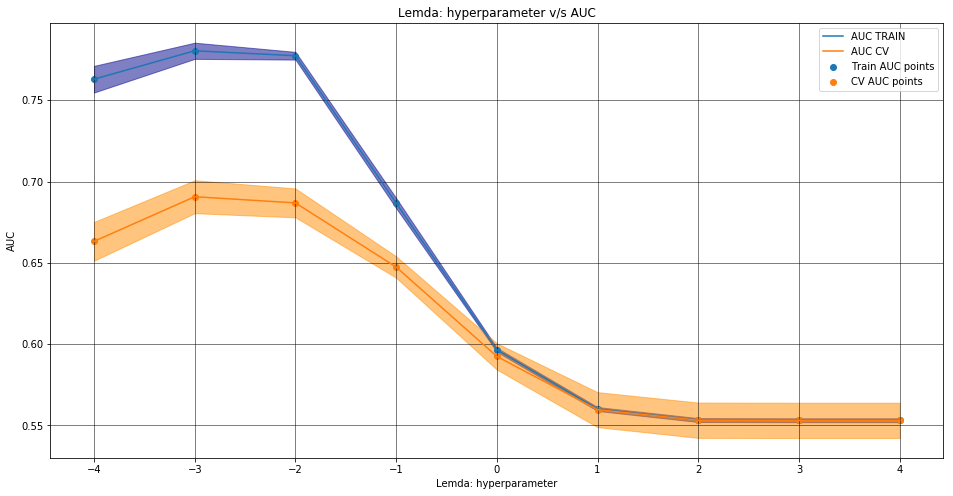

In [69]:
# SGDClassifier sklear -> https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# code copy from Assignment 4
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDClassifier 
from sklearn.metrics import roc_curve, auc
import math
log_alpha=[]
sv = SGDClassifier(loss='hinge', penalty='l2')

parameters = {'alpha':[10**x for x in range(-4, 5, 1)]}

grid = GridSearchCV(sv, parameters, cv= 10, scoring='roc_auc')
grid.fit(x_train_LR,y_train)


train_auc= grid.cv_results_['mean_train_score']
train_auc_std= grid.cv_results_['std_train_score']
cv_auc = grid.cv_results_['mean_test_score'] 
cv_auc_std= grid.cv_results_['std_test_score']

for x in tqdm(parameters['alpha']):
    y = math.log10(x)
    log_alpha.append(y)
print(parameters['alpha'])
print(log_alpha)
plt.figure(figsize=(16,8))

plt.plot(log_alpha, train_auc, label='AUC TRAIN')
plt.gca().fill_between(log_alpha,train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.5,color='darkblue')

plt.plot(log_alpha, cv_auc, label='AUC CV')
plt.gca().fill_between(log_alpha,cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.5,color='darkorange')

plt.scatter(log_alpha, train_auc, label='Train AUC points')
plt.scatter(log_alpha, cv_auc, label='CV AUC points')


plt.legend()
plt.xlabel("Lemda: hyperparameter")
plt.ylabel("AUC")
plt.title("Lemda: hyperparameter v/s AUC")
plt.grid(color='black', linestyle='-', linewidth=0.5)
plt.show()


In [70]:

print("Best HyperParameter: ",grid.best_params_)
print("Best Accuracy: %.2f%%"%(grid.best_score_*100))

Best HyperParameter:  {'alpha': 0.001}
Best Accuracy: 69.07%


100%|████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<?, ?it/s]


[0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]
[-4.0, -3.0, -2.0, -1.0, 0.0, 1.0, 2.0, 3.0, 4.0]


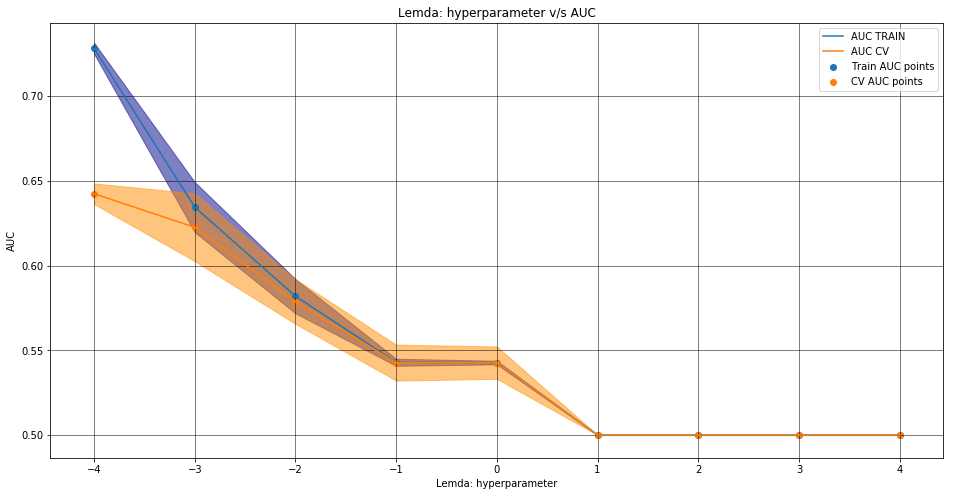

In [71]:
# SGDClassifier sklear -> https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# code copy from Assignment 4
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDClassifier 
from sklearn.metrics import roc_curve, auc
import math
log_alpha=[]
sv = SGDClassifier(loss='hinge', penalty='l1')

parameters = {'alpha':[10**x for x in range(-4, 5, 1)]}

grid = GridSearchCV(sv, parameters, cv= 10, scoring='roc_auc')
grid.fit(x_train_LR,y_train)


train_auc= grid.cv_results_['mean_train_score']
train_auc_std= grid.cv_results_['std_train_score']
cv_auc = grid.cv_results_['mean_test_score'] 
cv_auc_std= grid.cv_results_['std_test_score']

for x in tqdm(parameters['alpha']):
    y = math.log10(x)
    log_alpha.append(y)
print(parameters['alpha'])
print(log_alpha)
plt.figure(figsize=(16,8))

plt.plot(log_alpha, train_auc, label='AUC TRAIN')
plt.gca().fill_between(log_alpha,train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.5,color='darkblue')

plt.plot(log_alpha, cv_auc, label='AUC CV')
plt.gca().fill_between(log_alpha,cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.5,color='darkorange')

plt.scatter(log_alpha, train_auc, label='Train AUC points')
plt.scatter(log_alpha, cv_auc, label='CV AUC points')


plt.legend()
plt.xlabel("Lemda: hyperparameter")
plt.ylabel("AUC")
plt.title("Lemda: hyperparameter v/s AUC")
plt.grid(color='black', linestyle='-', linewidth=0.5)
plt.show()


In [72]:
print("Best HyperParameter: ",grid.best_params_)
print("Best Accuracy: %.2f%%"%(grid.best_score_*100))

Best HyperParameter:  {'alpha': 0.0001}
Best Accuracy: 64.24%


In [73]:
# code copy from Assignment 4
from sklearn.linear_model import SGDClassifier 
from sklearn.metrics import roc_curve, auc
import math
parameters = {'alpha':[10**x for x in range(-4, 5, 1)],'penalty':['l1','l2']}

grid = GridSearchCV(sv, parameters, cv= 10, scoring='roc_auc')
grid.fit(x_train_LR,y_train)


train_auc= grid.cv_results_['mean_train_score']
train_auc_std= grid.cv_results_['std_train_score']
cv_auc = grid.cv_results_['mean_test_score'] 
cv_auc_std= grid.cv_results_['std_test_score']

penalty_hyperparameter_bow=grid.best_params_['penalty']
alpha_hyperparameter_bow=grid.best_params_['alpha']
print("Best HyperParameter: ",grid.best_params_)
print("Best Accuracy: %.2f%%"%(grid.best_score_*100))

Best HyperParameter:  {'alpha': 0.001, 'penalty': 'l2'}
Best Accuracy: 68.98%


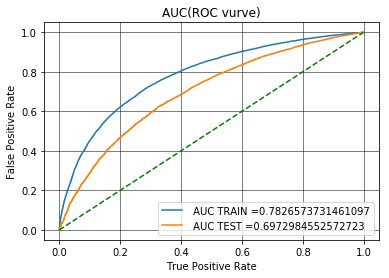

In [74]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc


neigh = SGDClassifier(loss='hinge',alpha = alpha_hyperparameter_bow,penalty=penalty_hyperparameter_bow,class_weight='balanced')
neigh.fit(x_train_LR, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = neigh.decision_function(x_train_LR)    
y_test_pred = neigh.decision_function(x_test_LR) 

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.grid()

plt.plot(train_fpr, train_tpr, label=" AUC TRAIN ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label=" AUC TEST ="+str(auc(test_fpr, test_tpr)))
plt.plot([0,1],[0,1],'g--')
plt.legend()
plt.xlabel("True Positive Rate")
plt.ylabel("False Positive Rate")
plt.title("AUC(ROC vurve)")
plt.grid(color='black', linestyle='-', linewidth=0.5)
plt.show()

In [75]:
# we are writing our own function for predict, with defined thresould
# we will pick a threshold that will give the least fpr
def predict(proba, threshould, fpr, tpr):
    
    t = threshould[np.argmax(tpr*(1-fpr))]
    
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    predictions = []
    for i in proba:
        if i>=t:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

In [76]:
#code copy from Instagtam page (data _science_info)
# seaborn heatmap _https://seaborn.pydata.org/generated/seaborn.heatmap.html
print("="*100)
from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
cm1=confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_tpr))
print(cm1)

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.5128144555375054 for threshold 1.224
[[ 8310  3239]
 [18653 46271]]


the maximum value of tpr*(1-fpr) 0.5128144555375054 for threshold 1.224


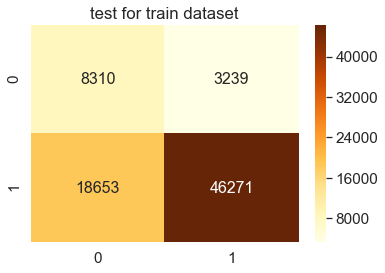

In [77]:

con_met_set_1 =pd.DataFrame(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds,train_fpr,train_tpr)),range(2),range(2))
sns.set(font_scale=1.4)

sns.heatmap(con_met_set_1,annot=True, fmt="g",cmap="YlOrBr",annot_kws={"size": 16})
plt.title("test for train dataset")
plt.show()


Test confusion matrix
the maximum value of tpr*(1-fpr) 0.42038230096896295 for threshold 1.536
[[ 3368  1625]
 [10468 17314]]
the maximum value of tpr*(1-fpr) 0.42038230096896295 for threshold 1.536


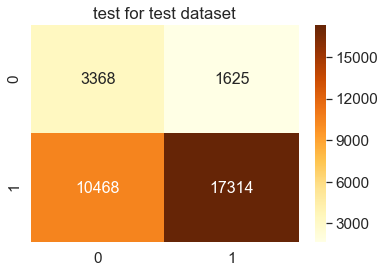

In [78]:
print("Test confusion matrix")
cm2=confusion_matrix(y_test, predict(y_test_pred, te_thresholds, test_fpr, test_tpr))
print(cm2)
con_met2_set_1 =pd.DataFrame(confusion_matrix(y_test, predict(y_test_pred, te_thresholds,test_fpr,test_tpr)),range(2),range(2))
sns.set(font_scale=1.4)

sns.heatmap(con_met2_set_1,annot= True, fmt="d",cmap="YlOrBr",annot_kws={"size": 16})
plt.title("test for test dataset")
plt.show()

# Set 2: TFIDF
categorical, numerical features + project_title(TFIDF)+ preprocessed_eassay (TFIDF)

In [79]:
x_train_LR = hstack((categories_x_train_one_hot, sub_categories_x_train_one_hot, school_state_x_train_one_hot, teacher_prefix_x_train_one_hot, project_grade_category_x_train_one_hot, xpd_train_price_std, xpd_train_quantity_std, xpd_train_tnoppp_std, preprocessed_project_title_x_train_TFIDF, preprocessed_essays_x_train_TFIDF,xpd_train_wce_std, xpd_train_wct_std, xpd_train_neg_std, xpd_train_pos_std, xpd_train_neu_std, xpd_train_comp_std)).tocsr()
x_test_LR = hstack((categories_x_test_one_hot , sub_categories_x_test_one_hot, school_state_x_test_one_hot, teacher_prefix_x_test_one_hot, project_grade_category_x_test_one_hot, xpd_test_price_std, xpd_test_quantity_std, xpd_test_tnoppp_std , preprocessed_project_title_x_test_TFIDF, preprocessed_essays_x_test_TFIDF,xpd_test_wce_std, xpd_test_wct_std, xpd_test_neg_std, xpd_test_pos_std, xpd_test_neu_std, xpd_test_comp_std)).tocsr()
"""x_cv_LR = hstack((categories_x_cv_one_hot, sub_categories_x_cv_one_hot, school_state_x_cv_one_hot, teacher_prefix_x_cv_one_hot, project_grade_category_x_cv_one_hot, xpd_cv_price_std, xpd_cv_quantity_std, xpd_cv_tnoppp_std, preprocessed_project_title_x_cv_TFIDF, preprocessed_essays_x_cv_TFIDF,xpd_cv_wce_std, xpd_cv_wct_std, xpd_cv_neg_std, xpd_cv_pos_std, xpd_cv_neu_std, xpd_cv_comp_std)).tocsr()"""


print("Final Data Metrix for train test is")
print(x_train_LR.shape)
print(x_test_LR.shape)


Final Data Metrix for train test is
(76473, 17177)
(32775, 17177)


100%|████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<?, ?it/s]


[0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]
[-4.0, -3.0, -2.0, -1.0, 0.0, 1.0, 2.0, 3.0, 4.0]


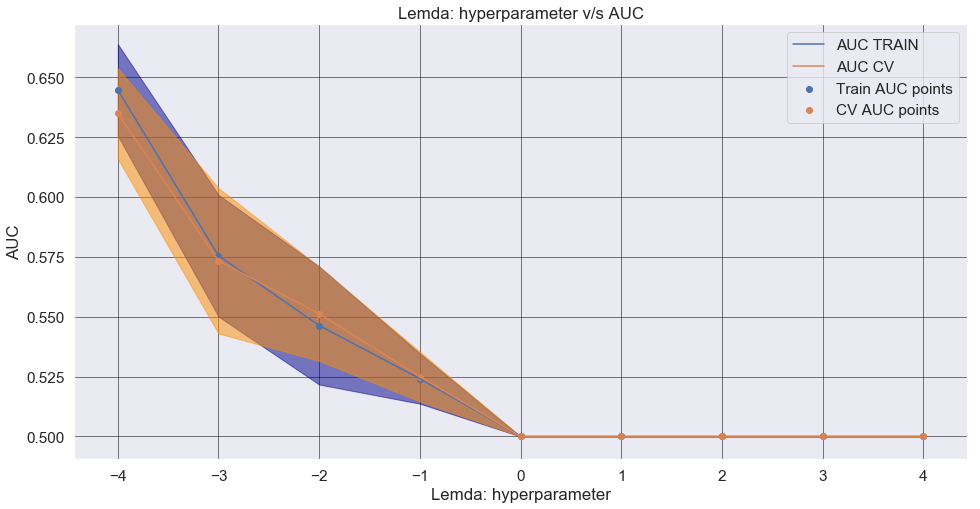

Best HyperParameter:  {'alpha': 0.0001}
Best Accuracy: 63.49%


In [80]:
# SGDClassifier sklear -> https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# code copy from Assignment 4
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDClassifier 
from sklearn.metrics import roc_curve, auc
import math
log_alpha=[]
sv = SGDClassifier(loss='hinge', penalty='l1')

parameters = {'alpha':[10**x for x in range(-4, 5, 1)]}

grid = GridSearchCV(sv, parameters, cv= 10, scoring='roc_auc')
grid.fit(x_train_LR,y_train)


train_auc= grid.cv_results_['mean_train_score']
train_auc_std= grid.cv_results_['std_train_score']
cv_auc = grid.cv_results_['mean_test_score'] 
cv_auc_std= grid.cv_results_['std_test_score']

for x in tqdm(parameters['alpha']):
    y = math.log10(x)
    log_alpha.append(y)
print(parameters['alpha'])
print(log_alpha)
plt.figure(figsize=(16,8))

plt.plot(log_alpha, train_auc, label='AUC TRAIN')
plt.gca().fill_between(log_alpha,train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.5,color='darkblue')

plt.plot(log_alpha, cv_auc, label='AUC CV')
plt.gca().fill_between(log_alpha,cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.5,color='darkorange')

plt.scatter(log_alpha, train_auc, label='Train AUC points')
plt.scatter(log_alpha, cv_auc, label='CV AUC points')


plt.legend()
plt.xlabel("Lemda: hyperparameter")
plt.ylabel("AUC")
plt.title("Lemda: hyperparameter v/s AUC")
plt.grid(color='black', linestyle='-', linewidth=0.5)
plt.show()



print("Best HyperParameter: ",grid.best_params_)
print("Best Accuracy: %.2f%%"%(grid.best_score_*100))

100%|████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<?, ?it/s]


[0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]
[-4.0, -3.0, -2.0, -1.0, 0.0, 1.0, 2.0, 3.0, 4.0]


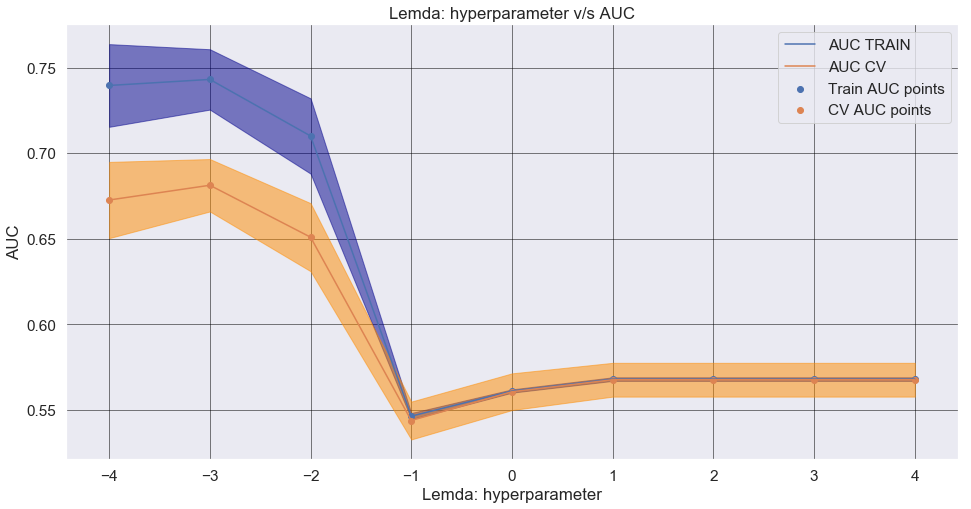

Best HyperParameter:  {'alpha': 0.001}
Best Accuracy: 68.12%


In [81]:
# SGDClassifier sklear -> https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# code copy from Assignment 4
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDClassifier 
from sklearn.metrics import roc_curve, auc
import math
log_alpha=[]
sv = SGDClassifier(loss='hinge', penalty='l2')

parameters = {'alpha':[10**x for x in range(-4, 5, 1)]}

grid = GridSearchCV(sv, parameters, cv= 10, scoring='roc_auc')
grid.fit(x_train_LR,y_train)


train_auc= grid.cv_results_['mean_train_score']
train_auc_std= grid.cv_results_['std_train_score']
cv_auc = grid.cv_results_['mean_test_score'] 
cv_auc_std= grid.cv_results_['std_test_score']

for x in tqdm(parameters['alpha']):
    y = math.log10(x)
    log_alpha.append(y)
print(parameters['alpha'])
print(log_alpha)
plt.figure(figsize=(16,8))

plt.plot(log_alpha, train_auc, label='AUC TRAIN')
plt.gca().fill_between(log_alpha,train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.5,color='darkblue')

plt.plot(log_alpha, cv_auc, label='AUC CV')
plt.gca().fill_between(log_alpha,cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.5,color='darkorange')

plt.scatter(log_alpha, train_auc, label='Train AUC points')
plt.scatter(log_alpha, cv_auc, label='CV AUC points')


plt.legend()
plt.xlabel("Lemda: hyperparameter")
plt.ylabel("AUC")
plt.title("Lemda: hyperparameter v/s AUC")
plt.grid(color='black', linestyle='-', linewidth=0.5)
plt.show()



print("Best HyperParameter: ",grid.best_params_)
print("Best Accuracy: %.2f%%"%(grid.best_score_*100))

In [82]:
# code copy from Assignment 4
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDClassifier 
from sklearn.metrics import roc_curve, auc
import math

parameters = {'alpha':[10**x for x in range(-4, 5, 1)],'penalty':['l1','l2']}

grid = GridSearchCV(sv, parameters, cv= 10, scoring='roc_auc')
grid.fit(x_train_LR,y_train)


train_auc= grid.cv_results_['mean_train_score']
train_auc_std= grid.cv_results_['std_train_score']
cv_auc = grid.cv_results_['mean_test_score'] 
cv_auc_std= grid.cv_results_['std_test_score']

penalty_hyperparameter_tfidf=grid.best_params_['penalty']
alpha_hyperparameter_tfidf=grid.best_params_['alpha']
print("Best HyperParameter: ",grid.best_params_)
print("Best Accuracy: %.2f%%"%(grid.best_score_*100))

Best HyperParameter:  {'alpha': 0.0001, 'penalty': 'l2'}
Best Accuracy: 66.41%


In [83]:

print("Regulizer =",penalty_hyperparameter_tfidf)
print("Alpha",alpha_hyperparameter_tfidf)

Regulizer = l2
Alpha 0.0001


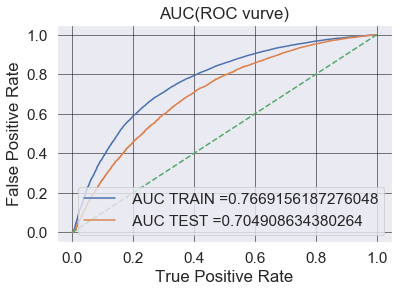

In [84]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc


neigh = SGDClassifier(loss='hinge',alpha = alpha_hyperparameter_tfidf,penalty=penalty_hyperparameter_tfidf,class_weight='balanced')
neigh.fit(x_train_LR, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = neigh.decision_function(x_train_LR)    
y_test_pred = neigh.decision_function(x_test_LR) 

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.grid()

plt.plot(train_fpr, train_tpr, label=" AUC TRAIN ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label=" AUC TEST ="+str(auc(test_fpr, test_tpr)))
plt.plot([0,1],[0,1],'g--')
plt.legend()
plt.xlabel("True Positive Rate")
plt.ylabel("False Positive Rate")
plt.title("AUC(ROC vurve)")
plt.grid(color='black', linestyle='-', linewidth=0.5)
plt.show()

In [85]:
# we are writing our own function for predict, with defined thresould
# we will pick a threshold that will give the least fpr
def predict(proba, threshould, fpr, tpr):
    
    t = threshould[np.argmax(tpr*(1-fpr))]
    
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    predictions = []
    for i in proba:
        if i>=t:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

In [86]:
#code copy from Instagtam page (data _science_info)
# seaborn heatmap _https://seaborn.pydata.org/generated/seaborn.heatmap.html
print("="*100)
from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
cm1=confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_tpr))
print(cm1)

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.4978038783395322 for threshold -0.245
[[ 8439  3110]
 [20694 44230]]


the maximum value of tpr*(1-fpr) 0.4978038783395322 for threshold -0.245


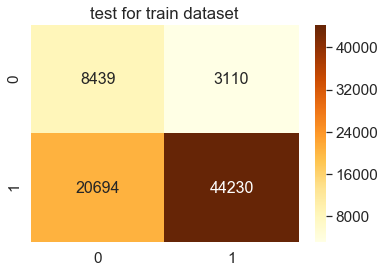

In [87]:

con_met_set_1 =pd.DataFrame(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds,train_fpr,train_tpr)),range(2),range(2))
sns.set(font_scale=1.4)
sns.heatmap(con_met_set_1,annot=True, fmt="g",cmap="YlOrBr",annot_kws={"size": 16})
plt.title("test for train dataset")
plt.show()


Test confusion matrix
the maximum value of tpr*(1-fpr) 0.4286200089815469 for threshold -0.317
[[ 3125  1868]
 [ 8756 19026]]
the maximum value of tpr*(1-fpr) 0.4286200089815469 for threshold -0.317


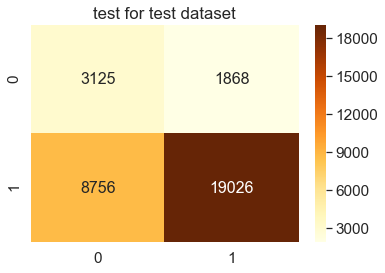

In [88]:
print("Test confusion matrix")
cm2=confusion_matrix(y_test, predict(y_test_pred, te_thresholds, test_fpr, test_tpr))
print(cm2)
con_met2_set_1 =pd.DataFrame(confusion_matrix(y_test, predict(y_test_pred, te_thresholds,test_fpr,test_tpr)),range(2),range(2))
sns.set(font_scale=1.4)
sns.heatmap(con_met2_set_1,annot= True, fmt="d",cmap="YlOrBr",annot_kws={"size": 16})
plt.title("test for test dataset")
plt.show()

# Set 3: AVG W2V
categorical, numerical features + project_title(AVG W2V)+ preprocessed_eassay (AVG W2V)

In [89]:
x_train_LR = hstack((categories_x_train_one_hot, sub_categories_x_train_one_hot, school_state_x_train_one_hot, teacher_prefix_x_train_one_hot, project_grade_category_x_train_one_hot, xpd_train_price_std, xpd_train_quantity_std, xpd_train_tnoppp_std, avg_w2v_vectors_x_train, avg_w2v_vectors_title_x_train,xpd_train_wce_std, xpd_train_wct_std, xpd_train_neg_std, xpd_train_pos_std, xpd_train_neu_std, xpd_train_comp_std)).tocsr()
x_test_LR = hstack((categories_x_test_one_hot , sub_categories_x_test_one_hot, school_state_x_test_one_hot, teacher_prefix_x_test_one_hot, project_grade_category_x_test_one_hot, xpd_test_price_std, xpd_test_quantity_std, xpd_test_tnoppp_std , avg_w2v_vectors_x_test, avg_w2v_vectors_title_x_test,xpd_test_wce_std, xpd_test_wct_std, xpd_test_neg_std, xpd_test_pos_std, xpd_test_neu_std, xpd_test_comp_std)).tocsr()
"""x_cv_LR = hstack((categories_x_cv_one_hot, sub_categories_x_cv_one_hot, school_state_x_cv_one_hot, teacher_prefix_x_cv_one_hot, project_grade_category_x_cv_one_hot, xpd_cv_price_std, xpd_cv_quantity_std, xpd_cv_tnoppp_std, avg_w2v_vectors_x_cv, avg_w2v_vectors_title_x_cv,xpd_cv_wce_std, xpd_cv_wct_std, xpd_cv_neg_std, xpd_cv_pos_std, xpd_cv_neu_std, xpd_cv_comp_std)).tocsr()"""


print("Final Data Metrix for train test is")
print(x_train_LR.shape)
print(x_test_LR.shape)


Final Data Metrix for train test is
(76473, 708)
(32775, 708)


100%|████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<?, ?it/s]


[0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]
[-4.0, -3.0, -2.0, -1.0, 0.0, 1.0, 2.0, 3.0, 4.0]


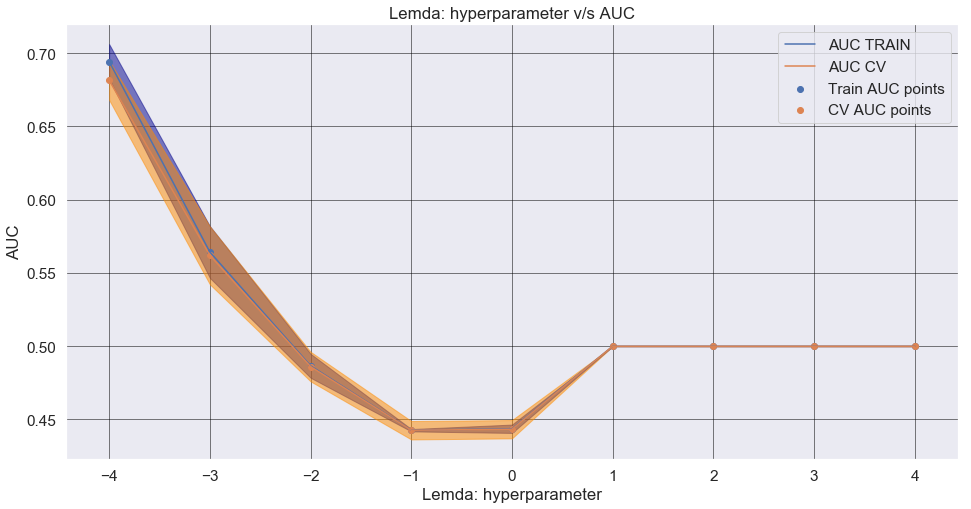

Best HyperParameter:  {'alpha': 0.0001}
Best Accuracy: 68.15%


In [90]:
# SGDClassifier sklear -> https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# code copy from Assignment 4
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDClassifier 
from sklearn.metrics import roc_curve, auc
import math
log_alpha=[]
sv = SGDClassifier(loss='hinge', penalty='l1')

parameters = {'alpha':[10**x for x in range(-4, 5, 1)]}

grid = GridSearchCV(sv, parameters, cv= 10, scoring='roc_auc')
grid.fit(x_train_LR,y_train)


train_auc= grid.cv_results_['mean_train_score']
train_auc_std= grid.cv_results_['std_train_score']
cv_auc = grid.cv_results_['mean_test_score'] 
cv_auc_std= grid.cv_results_['std_test_score']

for x in tqdm(parameters['alpha']):
    y = math.log10(x)
    log_alpha.append(y)
print(parameters['alpha'])
print(log_alpha)
plt.figure(figsize=(16,8))

plt.plot(log_alpha, train_auc, label='AUC TRAIN')
plt.gca().fill_between(log_alpha,train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.5,color='darkblue')

plt.plot(log_alpha, cv_auc, label='AUC CV')
plt.gca().fill_between(log_alpha,cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.5,color='darkorange')

plt.scatter(log_alpha, train_auc, label='Train AUC points')
plt.scatter(log_alpha, cv_auc, label='CV AUC points')


plt.legend()
plt.xlabel("Lemda: hyperparameter")
plt.ylabel("AUC")
plt.title("Lemda: hyperparameter v/s AUC")
plt.grid(color='black', linestyle='-', linewidth=0.5)
plt.show()



print("Best HyperParameter: ",grid.best_params_)
print("Best Accuracy: %.2f%%"%(grid.best_score_*100))

100%|████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<?, ?it/s]


[0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]
[-4.0, -3.0, -2.0, -1.0, 0.0, 1.0, 2.0, 3.0, 4.0]


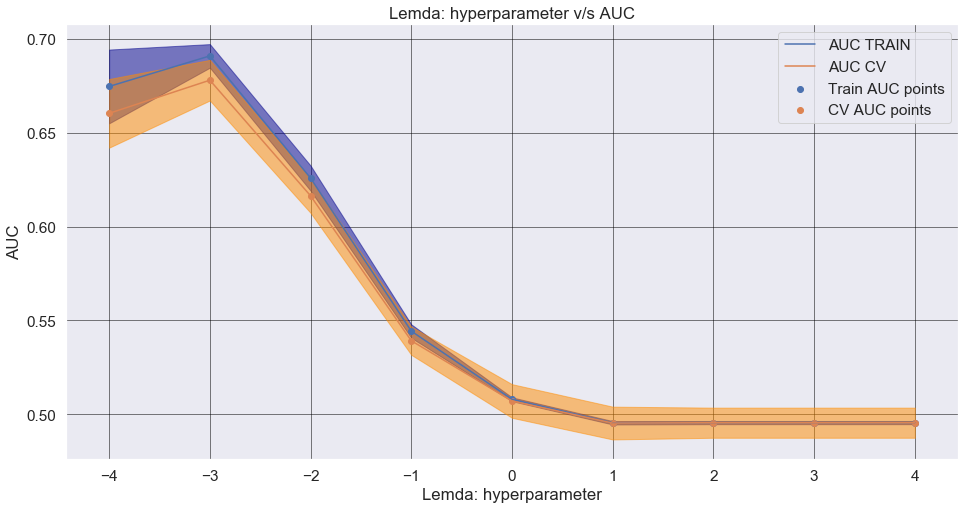

Best HyperParameter:  {'alpha': 0.001}
Best Accuracy: 67.80%


In [91]:
# SGDClassifier sklear -> https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# code copy from Assignment 4
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDClassifier 
from sklearn.metrics import roc_curve, auc
import math
log_alpha=[]
sv = SGDClassifier(loss='hinge', penalty='l2')

parameters = {'alpha':[10**x for x in range(-4, 5, 1)]}

grid = GridSearchCV(sv, parameters, cv= 10, scoring='roc_auc')
grid.fit(x_train_LR,y_train)


train_auc= grid.cv_results_['mean_train_score']
train_auc_std= grid.cv_results_['std_train_score']
cv_auc = grid.cv_results_['mean_test_score'] 
cv_auc_std= grid.cv_results_['std_test_score']

for x in tqdm(parameters['alpha']):
    y = math.log10(x)
    log_alpha.append(y)
print(parameters['alpha'])
print(log_alpha)
plt.figure(figsize=(16,8))

plt.plot(log_alpha, train_auc, label='AUC TRAIN')
plt.gca().fill_between(log_alpha,train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.5,color='darkblue')

plt.plot(log_alpha, cv_auc, label='AUC CV')
plt.gca().fill_between(log_alpha,cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.5,color='darkorange')

plt.scatter(log_alpha, train_auc, label='Train AUC points')
plt.scatter(log_alpha, cv_auc, label='CV AUC points')


plt.legend()
plt.xlabel("Lemda: hyperparameter")
plt.ylabel("AUC")
plt.title("Lemda: hyperparameter v/s AUC")
plt.grid(color='black', linestyle='-', linewidth=0.5)
plt.show()



print("Best HyperParameter: ",grid.best_params_)
print("Best Accuracy: %.2f%%"%(grid.best_score_*100))

In [92]:
# code copy from Assignment 4
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDClassifier 
from sklearn.metrics import roc_curve, auc
import math
parameters = {'alpha':[10**x for x in range(-4, 5, 1)],'penalty':['l1','l2']}

grid = GridSearchCV(sv, parameters, cv= 10, scoring='roc_auc')
grid.fit(x_train_LR,y_train)


train_auc= grid.cv_results_['mean_train_score']
train_auc_std= grid.cv_results_['std_train_score']
cv_auc = grid.cv_results_['mean_test_score'] 
cv_auc_std= grid.cv_results_['std_test_score']

penalty_hyperparameter_avgw2v=grid.best_params_['penalty']
alpha_hyperparameter_avgw2v=grid.best_params_['alpha']
print("Best HyperParameter: ",grid.best_params_)
print("Best Accuracy: %.2f%%"%(grid.best_score_*100))

Best HyperParameter:  {'alpha': 0.0001, 'penalty': 'l1'}
Best Accuracy: 68.39%


In [93]:
print("Regulizer =",penalty_hyperparameter_avgw2v)
print("Alpha",alpha_hyperparameter_avgw2v)

Regulizer = l1
Alpha 0.0001


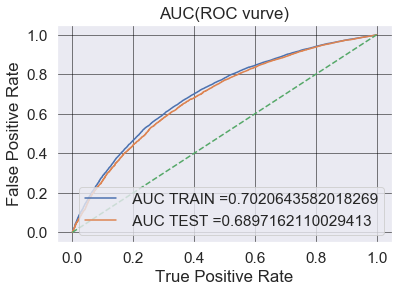

In [94]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc


neigh = SGDClassifier(loss='hinge',alpha = alpha_hyperparameter_avgw2v,penalty=penalty_hyperparameter_avgw2v,class_weight='balanced')
neigh.fit(x_train_LR, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = neigh.decision_function(x_train_LR)    
y_test_pred = neigh.decision_function(x_test_LR) 


train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.grid()

plt.plot(train_fpr, train_tpr, label=" AUC TRAIN ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label=" AUC TEST ="+str(auc(test_fpr, test_tpr)))
plt.plot([0,1],[0,1],'g--')
plt.legend()
plt.xlabel("True Positive Rate")
plt.ylabel("False Positive Rate")
plt.title("AUC(ROC vurve)")
plt.grid(color='black', linestyle='-', linewidth=0.5)
plt.show()

In [95]:
#code copy from Instagtam page (data _science_info)
# seaborn heatmap _https://seaborn.pydata.org/generated/seaborn.heatmap.html
print("="*100)
from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
cm1=confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_tpr))
print(cm1)

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.4250446030614405 for threshold -3.072
[[ 7342  4207]
 [21516 43408]]


the maximum value of tpr*(1-fpr) 0.4250446030614405 for threshold -3.072


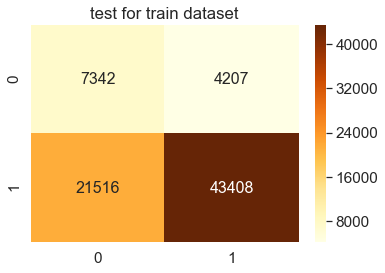

In [96]:

con_met_set_1 =pd.DataFrame(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds,train_fpr,train_tpr)),range(2),range(2))
sns.set(font_scale=1.4)
sns.heatmap(con_met_set_1,annot=True, fmt="g",cmap="YlOrBr",annot_kws={"size": 16})
plt.title("test for train dataset")
plt.show()


Test confusion matrix
the maximum value of tpr*(1-fpr) 0.4137721685170267 for threshold -3.023
[[ 3162  1831]
 [ 9630 18152]]
the maximum value of tpr*(1-fpr) 0.4137721685170267 for threshold -3.023


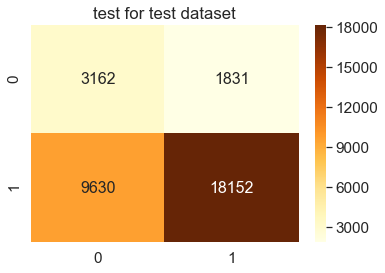

In [97]:
print("Test confusion matrix")
cm2=confusion_matrix(y_test, predict(y_test_pred, te_thresholds, test_fpr, test_tpr))
print(cm2)
con_met2_set_1 =pd.DataFrame(confusion_matrix(y_test, predict(y_test_pred, te_thresholds,test_fpr,test_tpr)),range(2),range(2))
sns.set(font_scale=1.4)
sns.heatmap(con_met2_set_1,annot= True, fmt="d",cmap="YlOrBr",annot_kws={"size": 16})
plt.title("test for test dataset")
plt.show()

# Set 4: TFIDF W2V
categorical, numerical features + project_title(TFIDF W2V)+ preprocessed_eassay (TFIDF W2V)

In [98]:
x_train_LR = hstack((categories_x_train_one_hot, sub_categories_x_train_one_hot, school_state_x_train_one_hot, teacher_prefix_x_train_one_hot, project_grade_category_x_train_one_hot, xpd_train_price_std, xpd_train_quantity_std, xpd_train_tnoppp_std, tfidf_x_train_w2v_vectors, tfidf_x_train_w2v_vectors_title,xpd_train_wce_std, xpd_train_wct_std, xpd_train_neg_std, xpd_train_pos_std, xpd_train_neu_std, xpd_train_comp_std)).tocsr()
x_test_LR = hstack((categories_x_test_one_hot , sub_categories_x_test_one_hot, school_state_x_test_one_hot, teacher_prefix_x_test_one_hot, project_grade_category_x_test_one_hot, xpd_test_price_std, xpd_test_quantity_std, xpd_test_tnoppp_std , tfidf_x_test_w2v_vectors, tfidf_x_test_w2v_vectors_title,xpd_test_wce_std, xpd_test_wct_std, xpd_test_neg_std, xpd_test_pos_std, xpd_test_neu_std, xpd_test_comp_std)).tocsr()
"""x_cv_LR = hstack((categories_x_cv_one_hot, sub_categories_x_cv_one_hot, school_state_x_cv_one_hot, teacher_prefix_x_cv_one_hot, project_grade_category_x_cv_one_hot, xpd_cv_price_std, xpd_cv_quantity_std, xpd_cv_tnoppp_std, tfidf_x_cv_w2v_vectors, tfidf_x_cv_w2v_vectors_title,xpd_cv_wce_std, xpd_cv_wct_std, xpd_cv_neg_std, xpd_cv_pos_std, xpd_cv_neu_std, xpd_cv_comp_std)).tocsr()"""


print("Final Data Metrix for train test and cv is")
print(x_train_LR.shape)
print(x_test_LR.shape)


Final Data Metrix for train test and cv is
(76473, 708)
(32775, 708)


100%|████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<?, ?it/s]


[0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]
[-4.0, -3.0, -2.0, -1.0, 0.0, 1.0, 2.0, 3.0, 4.0]


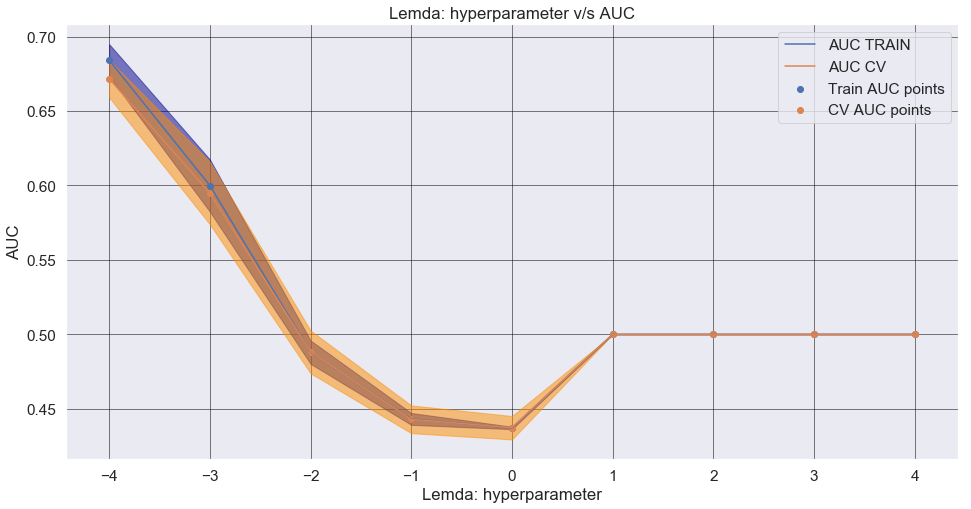

Best HyperParameter:  {'alpha': 0.0001}
Best Accuracy: 67.17%


In [99]:
# SGDClassifier sklear -> https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# code copy from Assignment 4
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDClassifier 
from sklearn.metrics import roc_curve, auc
import math
log_alpha=[]
sv = SGDClassifier(loss='hinge', penalty='l1')

parameters = {'alpha':[10**x for x in range(-4, 5, 1)]}

grid = GridSearchCV(sv, parameters, cv= 10, scoring='roc_auc')
grid.fit(x_train_LR,y_train)


train_auc= grid.cv_results_['mean_train_score']
train_auc_std= grid.cv_results_['std_train_score']
cv_auc = grid.cv_results_['mean_test_score'] 
cv_auc_std= grid.cv_results_['std_test_score']

for x in tqdm(parameters['alpha']):
    y = math.log10(x)
    log_alpha.append(y)
print(parameters['alpha'])
print(log_alpha)
plt.figure(figsize=(16,8))

plt.plot(log_alpha, train_auc, label='AUC TRAIN')
plt.gca().fill_between(log_alpha,train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.5,color='darkblue')

plt.plot(log_alpha, cv_auc, label='AUC CV')
plt.gca().fill_between(log_alpha,cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.5,color='darkorange')

plt.scatter(log_alpha, train_auc, label='Train AUC points')
plt.scatter(log_alpha, cv_auc, label='CV AUC points')


plt.legend()
plt.xlabel("Lemda: hyperparameter")
plt.ylabel("AUC")
plt.title("Lemda: hyperparameter v/s AUC")
plt.grid(color='black', linestyle='-', linewidth=0.5)
plt.show()



print("Best HyperParameter: ",grid.best_params_)
print("Best Accuracy: %.2f%%"%(grid.best_score_*100))

100%|████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<?, ?it/s]


[0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]
[-4.0, -3.0, -2.0, -1.0, 0.0, 1.0, 2.0, 3.0, 4.0]


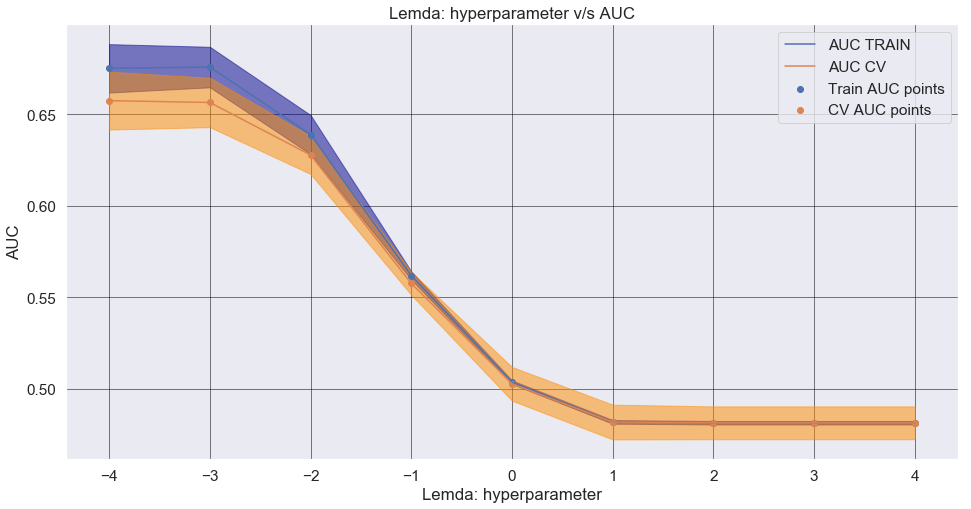

Best HyperParameter:  {'alpha': 0.0001}
Best Accuracy: 65.74%


In [100]:
# SGDClassifier sklear -> https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# code copy from Assignment 4
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDClassifier 
from sklearn.metrics import roc_curve, auc
import math
log_alpha=[]
sv = SGDClassifier(loss='hinge', penalty='l2')

parameters = {'alpha':[10**x for x in range(-4, 5, 1)]}

grid = GridSearchCV(sv, parameters, cv= 10, scoring='roc_auc')
grid.fit(x_train_LR,y_train)


train_auc= grid.cv_results_['mean_train_score']
train_auc_std= grid.cv_results_['std_train_score']
cv_auc = grid.cv_results_['mean_test_score'] 
cv_auc_std= grid.cv_results_['std_test_score']

for x in tqdm(parameters['alpha']):
    y = math.log10(x)
    log_alpha.append(y)
print(parameters['alpha'])
print(log_alpha)
plt.figure(figsize=(16,8))

plt.plot(log_alpha, train_auc, label='AUC TRAIN')
plt.gca().fill_between(log_alpha,train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.5,color='darkblue')

plt.plot(log_alpha, cv_auc, label='AUC CV')
plt.gca().fill_between(log_alpha,cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.5,color='darkorange')

plt.scatter(log_alpha, train_auc, label='Train AUC points')
plt.scatter(log_alpha, cv_auc, label='CV AUC points')


plt.legend()
plt.xlabel("Lemda: hyperparameter")
plt.ylabel("AUC")
plt.title("Lemda: hyperparameter v/s AUC")
plt.grid(color='black', linestyle='-', linewidth=0.5)
plt.show()



print("Best HyperParameter: ",grid.best_params_)
print("Best Accuracy: %.2f%%"%(grid.best_score_*100))

In [101]:
# code copy from Assignment 4
from sklearn.linear_model import SGDClassifier 
from sklearn.metrics import roc_curve, auc
import math
parameters = {'alpha':[10**x for x in range(-4, 5, 1)],'penalty':['l1','l2']}

grid = GridSearchCV(sv, parameters, cv= 10, scoring='roc_auc')
grid.fit(x_train_LR,y_train)


train_auc= grid.cv_results_['mean_train_score']
train_auc_std= grid.cv_results_['std_train_score']
cv_auc = grid.cv_results_['mean_test_score'] 
cv_auc_std= grid.cv_results_['std_test_score']

penalty_hyperparameter_tfidfw2v=grid.best_params_['penalty']
alpha_hyperparameter_tfidfw2v=grid.best_params_['alpha']
print("Best HyperParameter: ",grid.best_params_)
print("Best Accuracy: %.2f%%"%(grid.best_score_*100))

Best HyperParameter:  {'alpha': 0.0001, 'penalty': 'l1'}
Best Accuracy: 67.38%


In [102]:
print("Regulizer =",penalty_hyperparameter_tfidfw2v)
print("Alpha",alpha_hyperparameter_tfidfw2v)

Regulizer = l1
Alpha 0.0001


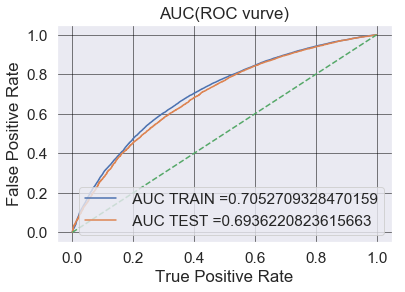

In [103]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc


neigh = SGDClassifier(loss='hinge',alpha = alpha_hyperparameter_tfidfw2v,penalty=penalty_hyperparameter_tfidfw2v,class_weight='balanced')
neigh.fit(x_train_LR, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = neigh.decision_function(x_train_LR)    
y_test_pred = neigh.decision_function(x_test_LR) 

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.grid()

plt.plot(train_fpr, train_tpr, label=" AUC TRAIN ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label=" AUC TEST ="+str(auc(test_fpr, test_tpr)))
plt.plot([0,1],[0,1],'g--')
plt.legend()
plt.xlabel("True Positive Rate")
plt.ylabel("False Positive Rate")
plt.title("AUC(ROC vurve)")
plt.grid(color='black', linestyle='-', linewidth=0.5)
plt.show()

In [104]:
#code copy from Instagtam page (data _science_info)
# seaborn heatmap _https://seaborn.pydata.org/generated/seaborn.heatmap.html
print("="*100)
from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
cm1=confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_tpr))
print(cm1)

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.42777106633465095 for threshold 1.505
[[ 7482  4067]
 [22055 42869]]


the maximum value of tpr*(1-fpr) 0.42777106633465095 for threshold 1.505


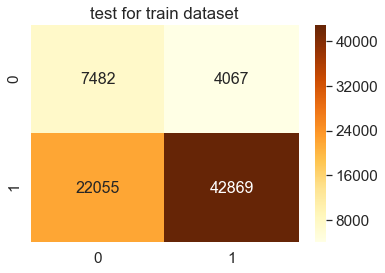

In [105]:

con_met_set_1 =pd.DataFrame(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds,train_fpr,train_tpr)),range(2),range(2))
sns.set(font_scale=1.4)
sns.heatmap(con_met_set_1,annot=True, fmt="g",cmap="YlOrBr",annot_kws={"size": 16})
plt.title("test for train dataset")
plt.show()


Test confusion matrix
the maximum value of tpr*(1-fpr) 0.4103591114955654 for threshold 1.437
[[ 3065  1928]
 [ 9210 18572]]
the maximum value of tpr*(1-fpr) 0.4103591114955654 for threshold 1.437


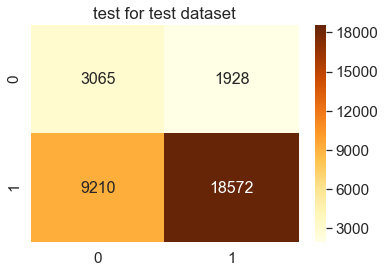

In [106]:
print("Test confusion matrix")
cm2=confusion_matrix(y_test, predict(y_test_pred, te_thresholds, test_fpr, test_tpr))
print(cm2)
con_met2_set_1 =pd.DataFrame(confusion_matrix(y_test, predict(y_test_pred, te_thresholds,test_fpr,test_tpr)),range(2),range(2))
sns.set(font_scale=1.4)
sns.heatmap(con_met2_set_1,annot= True, fmt="d",cmap="YlOrBr",annot_kws={"size": 16})
plt.title("test for test dataset")
plt.show()

<h2>2.5 Support Vector Machines with added Features `Set 5` </h2>
<li><strong>school_state</strong> : categorical data</li>
                <li><strong>clean_categories</strong> : categorical data</li>
                <li><strong>clean_subcategories</strong> : categorical data</li>
                <li><strong>project_grade_category</strong> :categorical data</li>
                <li><strong>teacher_prefix</strong> : categorical data</li>
                <li><strong>quantity</strong> : numerical data</li>
                <li><strong>teacher_number_of_previously_posted_projects</strong> : numerical data</li>
                <li><strong>price</strong> : numerical data</li>
                <li><strong>sentiment score's of each of the essay</strong> : numerical data</li>
                <li><strong>number of words in the title</strong> : numerical data</li>
                <li><strong>number of words in the combine essays</strong> : numerical data</li>

In [107]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

In [108]:
x_train_LR = hstack((categories_x_train_one_hot, sub_categories_x_train_one_hot, school_state_x_train_one_hot, teacher_prefix_x_train_one_hot, project_grade_category_x_train_one_hot, xpd_train_price_std, xpd_train_quantity_std, xpd_train_tnoppp_std,xpd_train_wce_std, xpd_train_wct_std, xpd_train_neg_std, xpd_train_pos_std, xpd_train_neu_std, xpd_train_comp_std)).tocsr()
x_test_LR = hstack((categories_x_test_one_hot , sub_categories_x_test_one_hot, school_state_x_test_one_hot, teacher_prefix_x_test_one_hot, project_grade_category_x_test_one_hot, xpd_test_price_std, xpd_test_quantity_std, xpd_test_tnoppp_std ,xpd_test_wce_std, xpd_test_wct_std, xpd_test_neg_std, xpd_test_pos_std, xpd_test_neu_std, xpd_test_comp_std)).tocsr()
"""x_cv_LR = hstack((categories_x_cv_one_hot, sub_categories_x_cv_one_hot, school_state_x_cv_one_hot, teacher_prefix_x_cv_one_hot, project_grade_category_x_cv_one_hot, xpd_cv_price_std, xpd_cv_quantity_std, xpd_cv_tnoppp_std, tfidf_x_cv_w2v_vectors, tfidf_x_cv_w2v_vectors_title,xpd_cv_wce_std, xpd_cv_wct_std, xpd_cv_neg_std, xpd_cv_pos_std, xpd_cv_neu_std, xpd_cv_comp_std)).tocsr()"""


print("Final Data Metrix for train test and cv is")
print(x_train_LR.shape)
print(x_test_LR.shape)


Final Data Metrix for train test and cv is
(76473, 108)
(32775, 108)


100%|████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<?, ?it/s]


[0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]
[-4.0, -3.0, -2.0, -1.0, 0.0, 1.0, 2.0, 3.0, 4.0]


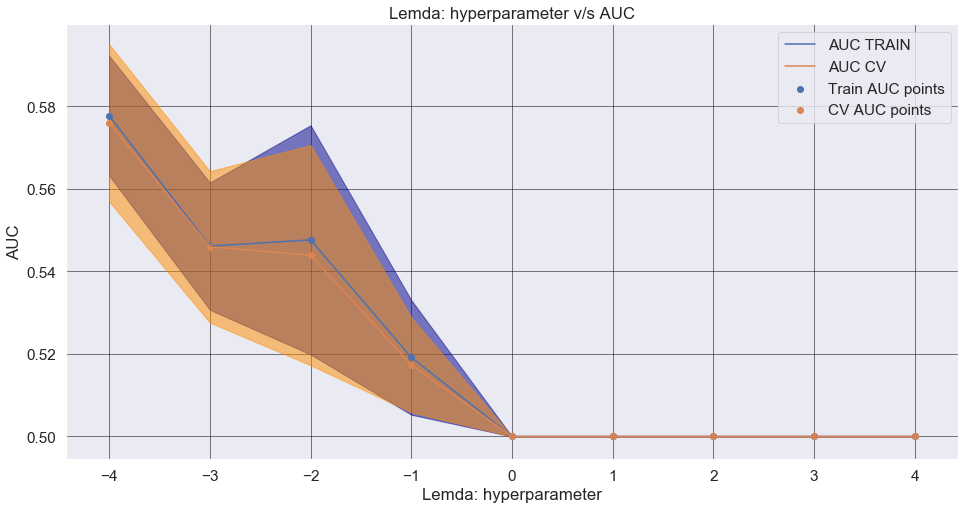

Best HyperParameter:  {'alpha': 0.0001}
Best Accuracy: 57.60%


In [109]:
# SGDClassifier sklear -> https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# code copy from Assignment 4
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDClassifier 
from sklearn.metrics import roc_curve, auc
import math
log_alpha=[]
sv = SGDClassifier(loss='hinge', penalty='l1')

parameters = {'alpha':[10**x for x in range(-4, 5, 1)]}

grid = GridSearchCV(sv, parameters, cv= 10, scoring='roc_auc')
grid.fit(x_train_LR,y_train)


train_auc= grid.cv_results_['mean_train_score']
train_auc_std= grid.cv_results_['std_train_score']
cv_auc = grid.cv_results_['mean_test_score'] 
cv_auc_std= grid.cv_results_['std_test_score']

for x in tqdm(parameters['alpha']):
    y = math.log10(x)
    log_alpha.append(y)
print(parameters['alpha'])
print(log_alpha)
plt.figure(figsize=(16,8))

plt.plot(log_alpha, train_auc, label='AUC TRAIN')
plt.gca().fill_between(log_alpha,train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.5,color='darkblue')

plt.plot(log_alpha, cv_auc, label='AUC CV')
plt.gca().fill_between(log_alpha,cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.5,color='darkorange')

plt.scatter(log_alpha, train_auc, label='Train AUC points')
plt.scatter(log_alpha, cv_auc, label='CV AUC points')


plt.legend()
plt.xlabel("Lemda: hyperparameter")
plt.ylabel("AUC")
plt.title("Lemda: hyperparameter v/s AUC")
plt.grid(color='black', linestyle='-', linewidth=0.5)
plt.show()



print("Best HyperParameter: ",grid.best_params_)
print("Best Accuracy: %.2f%%"%(grid.best_score_*100))

100%|████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<?, ?it/s]


[0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]
[-4.0, -3.0, -2.0, -1.0, 0.0, 1.0, 2.0, 3.0, 4.0]


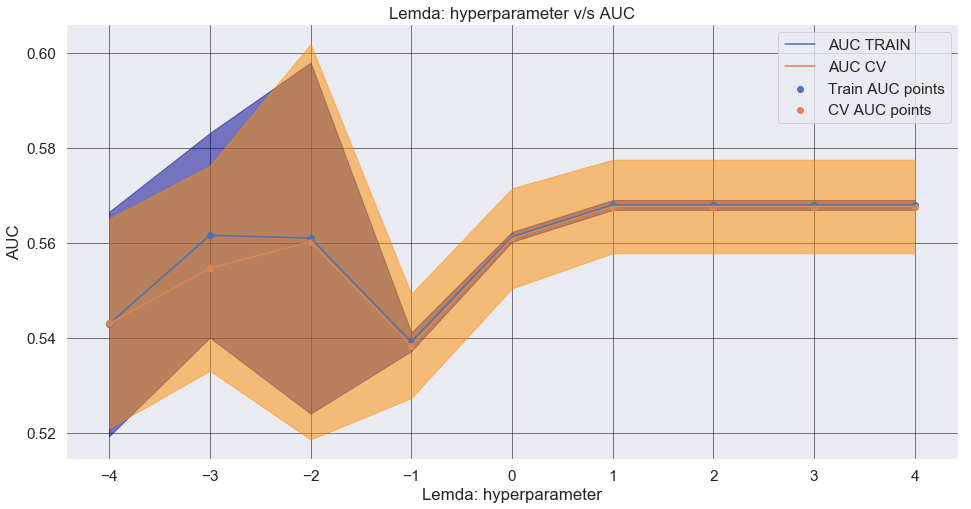

Best HyperParameter:  {'alpha': 10}
Best Accuracy: 56.76%


In [110]:
# SGDClassifier sklear -> https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# code copy from Assignment 4
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDClassifier 
from sklearn.metrics import roc_curve, auc
import math
log_alpha=[]
sv = SGDClassifier(loss='hinge', penalty='l2')

parameters = {'alpha':[10**x for x in range(-4, 5, 1)]}

grid = GridSearchCV(sv, parameters, cv= 10, scoring='roc_auc')
grid.fit(x_train_LR,y_train)


train_auc= grid.cv_results_['mean_train_score']
train_auc_std= grid.cv_results_['std_train_score']
cv_auc = grid.cv_results_['mean_test_score'] 
cv_auc_std= grid.cv_results_['std_test_score']

for x in tqdm(parameters['alpha']):
    y = math.log10(x)
    log_alpha.append(y)
print(parameters['alpha'])
print(log_alpha)
plt.figure(figsize=(16,8))

plt.plot(log_alpha, train_auc, label='AUC TRAIN')
plt.gca().fill_between(log_alpha,train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.5,color='darkblue')

plt.plot(log_alpha, cv_auc, label='AUC CV')
plt.gca().fill_between(log_alpha,cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.5,color='darkorange')

plt.scatter(log_alpha, train_auc, label='Train AUC points')
plt.scatter(log_alpha, cv_auc, label='CV AUC points')


plt.legend()
plt.xlabel("Lemda: hyperparameter")
plt.ylabel("AUC")
plt.title("Lemda: hyperparameter v/s AUC")
plt.grid(color='black', linestyle='-', linewidth=0.5)
plt.show()



print("Best HyperParameter: ",grid.best_params_)
print("Best Accuracy: %.2f%%"%(grid.best_score_*100))

In [111]:
# code copy from Assignment 4
from sklearn.linear_model import SGDClassifier 
from sklearn.metrics import roc_curve, auc
import math
parameters = {'alpha':[10**x for x in range(-4, 5, 1)],'penalty':['l1','l2']}

grid = GridSearchCV(sv, parameters, cv= 10, scoring='roc_auc')
grid.fit(x_train_LR,y_train)


train_auc= grid.cv_results_['mean_train_score']
train_auc_std= grid.cv_results_['std_train_score']
cv_auc = grid.cv_results_['mean_test_score'] 
cv_auc_std= grid.cv_results_['std_test_score']

penalty_hyperparameter_s5=grid.best_params_['penalty']
alpha_hyperparameter_s5=grid.best_params_['alpha']
print("Best HyperParameter: ",grid.best_params_)
print("Best Accuracy: %.2f%%"%(grid.best_score_*100))

Best HyperParameter:  {'alpha': 10, 'penalty': 'l2'}
Best Accuracy: 56.76%


In [112]:
print("Regulizer =",penalty_hyperparameter_s5)
print("Alpha",alpha_hyperparameter_s5)

Regulizer = l2
Alpha 10


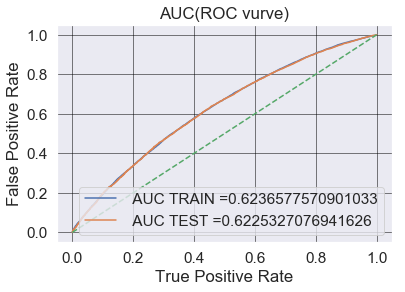

In [113]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc


neigh = SGDClassifier(loss='hinge',alpha = alpha_hyperparameter_s5,penalty=penalty_hyperparameter_s5,class_weight='balanced')
neigh.fit(x_train_LR, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = neigh.decision_function(x_train_LR)    
y_test_pred = neigh.decision_function(x_test_LR) 

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.grid()

plt.plot(train_fpr, train_tpr, label=" AUC TRAIN ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label=" AUC TEST ="+str(auc(test_fpr, test_tpr)))
plt.plot([0,1],[0,1],'g--')
plt.legend()
plt.xlabel("True Positive Rate")
plt.ylabel("False Positive Rate")
plt.title("AUC(ROC vurve)")
plt.grid(color='black', linestyle='-', linewidth=0.5)
plt.show()

In [114]:
#code copy from Instagtam page (data _science_info)
# seaborn heatmap _https://seaborn.pydata.org/generated/seaborn.heatmap.html
print("="*100)
from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
cm1=confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_tpr))
print(cm1)

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.34774528248242814 for threshold 0.0
[[ 6759  4790]
 [26347 38577]]


the maximum value of tpr*(1-fpr) 0.34774528248242814 for threshold 0.0


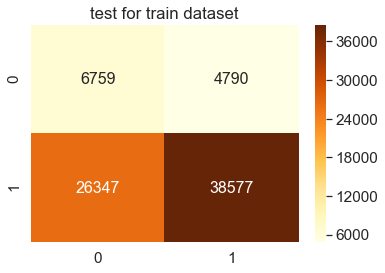

In [115]:

con_met_set_1 =pd.DataFrame(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds,train_fpr,train_tpr)),range(2),range(2))
sns.set(font_scale=1.4)
sns.heatmap(con_met_set_1,annot=True, fmt="g",cmap="YlOrBr",annot_kws={"size": 16})
plt.title("test for train dataset")
plt.show()


Test confusion matrix
the maximum value of tpr*(1-fpr) 0.34776381124056727 for threshold -0.001
[[ 2840  2153]
 [10796 16986]]
the maximum value of tpr*(1-fpr) 0.34776381124056727 for threshold -0.001


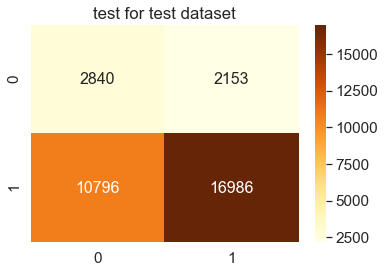

In [116]:
print("Test confusion matrix")
cm2=confusion_matrix(y_test, predict(y_test_pred, te_thresholds, test_fpr, test_tpr))
print(cm2)
con_met2_set_1 =pd.DataFrame(confusion_matrix(y_test, predict(y_test_pred, te_thresholds,test_fpr,test_tpr)),range(2),range(2))
sns.set(font_scale=1.4)
sns.heatmap(con_met2_set_1,annot= True, fmt="d",cmap="YlOrBr",annot_kws={"size": 16})
plt.title("test for test dataset")
plt.show()

<h1>3. Conclusion</h1>

In [117]:
# Please compare all your models using Prettytable library

In [119]:
from prettytable import PrettyTable
"""abc.field_names = ["Vectorizer Used", "Best_Lambda", "AUC_Train", "AUC_Test"]"""
"""abc.add_row(["BOW", 0.004, 0.65, 0.65])
abc.add_row(["TFIDF", 0.05, 0.66, 0.66])
abc.add_row(["AVG W2V", 0.5, 0.74, 0.72])
abc.add_row(["TFIDF W2V", 0.05, 0.73, 0.71])
abc.add_row(["No Text Feature",  0.0025,0.63,0.63])"""
# Add_column in prettytale -> http://zetcode.com/python/prettytable/
x = PrettyTable()

column_names = ["Vectorizer Used", "Best_Alpha","Best L1 OR L2 Regularization ", "AUC_Train", "AUC_TEST"]
x.add_column(column_names[0], [ "BOW", "TFIDF", "AVG W2V", "TFIDF W2V", "No Text Feature"])
x.add_column(column_names[1], [ 0.001, 0.0001, 0.0001, 0.0001, 10 ])  
x.add_column(column_names[2], [ "L2", "L2", "L1", "L1", "L2" ])  
x.add_column(column_names[3], [ 0.78, 0.76, 0.70, 0.70, 0.62 ])
x.add_column(column_names[4], [ 0.69, 0.69, 0.68, 0.69, 0.62 ])

print(x)

# If you are If you are facing any error like TypeError ('list' object is not callable) at add_row then use add_colum. 

+-----------------+------------+-------------------------------+-----------+----------+
| Vectorizer Used | Best_Alpha | Best L1 OR L2 Regularization  | AUC_Train | AUC_TEST |
+-----------------+------------+-------------------------------+-----------+----------+
|       BOW       |   0.001    |               L2              |    0.78   |   0.69   |
|      TFIDF      |   0.0001   |               L2              |    0.76   |   0.69   |
|     AVG W2V     |   0.0001   |               L1              |    0.7    |   0.68   |
|    TFIDF W2V    |   0.0001   |               L1              |    0.7    |   0.69   |
| No Text Feature |     10     |               L2              |    0.62   |   0.62   |
+-----------------+------------+-------------------------------+-----------+----------+


https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html

Linear classifiers (SVM) with SGD training.

Support vector machine is a linear classifier with hinge loss. 
I have used SGD (stocastice gradient descent) classifier with loss=hinge. 
The regularizer is a penalty added to the loss function that shrinks model parameters towards the zero vector using either the squared Euclidean norm L2 or the absolute norm L1 or a combination of both (Elastic Net).

### - Observation 
1. I have used best_params_ to get Best L1 or L2 Regularization and Alpha. 
2. L2 Regularization is slightly dominant, then L1 in this case. 
3. The smaller Alpha we have the best result we can get. 
4. If we include text as a feature, then AUC_test is around 69% and without text (SET 5) gives AUC_test = 0.62, which means Text feature is playing an important role. 
5. For linear SVM, BOW Vectorizing Vectorizing gives better result then others. 
6. For Set 5 (Fithout text feature) Alpha value is very high and gives very low AUC value.